In [1]:
#! pip install pydotplus

import sys, re, os
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True

In [5]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

In [6]:
# Some helper functions
def get_stat(stat_name, source="general/fastclick-varied-cbr-rates.csv", index=1):
    stat = []
    with open(source) as file:
        for line in file:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

def plot_stat(stat_name, ax, source, index=1):
    stat = get_stat(stat_name, source, index)
    ax.plot(stat)
    ax.grid(True)
    ax.set_title(stat_name)

def plot_stats(stat_names, source="fastclick-varied-cbr-rates.csv", index=1):
    i = 1
    fig, ax = plt.subplots(len(stat_names),2)
    for s in stat_names:
        ax = plt.subplot(len(stat_names),1, i)
        plot_stat(s, ax, source, index)
        i+=1
    fig.tight_layout()
    

# Service chain configuration

In [7]:
from IPython.display import IFrame
IFrame("../assets/testbed.pdf", width=600, height=420)

In [8]:
# Metadata for specific SFC configurations
exp_ls = "fixed_rate_7500"
vnfs = ["firewall.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv", "bridge.csv"]

# Load stimulus experiments

## High-level KPIs:


In [9]:
def parse_seq(exp_type, exp_num, file, index=5):
    "Parse sequential data, specialized for the TX/RX/Latency experiments"
    tmp = []

    if file.startswith("latency.csv"):
        with open(os.path.join(exp_type, exp_num, file)) as f:
            lines = f.readlines()[4:] if exp_type == "load_stimulus" else f.readlines()
            for line in lines:
                try:
                    value = float(line.strip()) / 1000
                except ValueError:
                    value = "N/A"
                tmp.append(value)
    else:
        with open(os.path.join(exp_type, exp_num, file)) as f:
            next(f)
            for l in f:
                try:
                    value = float(l.strip().split(",")[index])
                except ValueError:
                    value = "N/A"
                tmp.append(value)

    return tmp


In [10]:
def parse_reg(exp_type, exp_num, file, stat_name, index=1):
    "Parse the Perf data"
    stat = []
    with open(os.path.join(exp_type, exp_num, file)) as file:
        for line in file:
            if re.search(stat_name, line):
                try:
                    value = float(line.strip().split(',')[index])
                except ValueError:
                    value = "N/A"
                stat.append(value)

    return stat


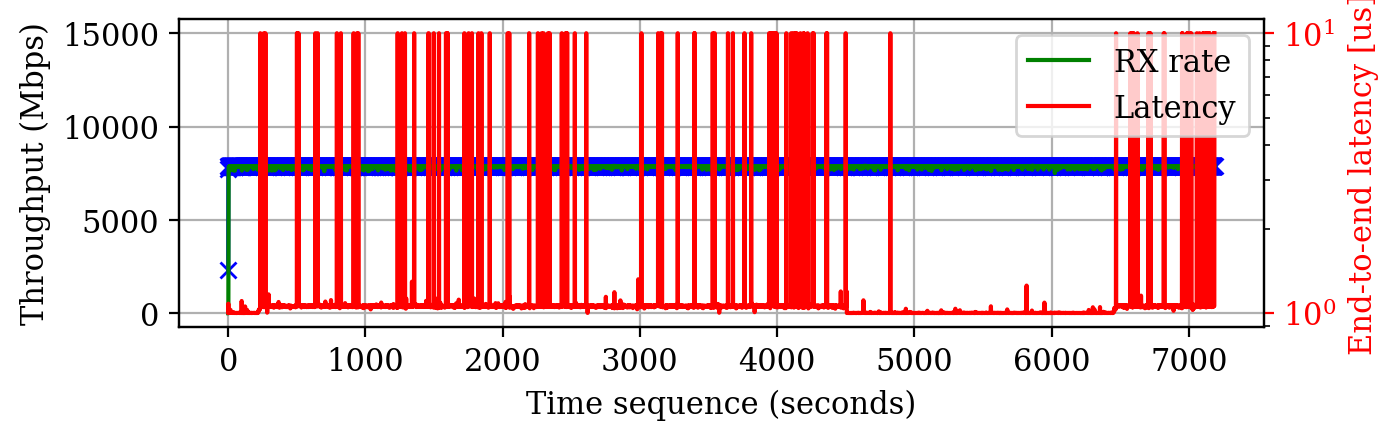

In [11]:
fig, ax = plt.subplots(figsize = (7,2))
ax.grid(True)
ax.set_xlabel("Time sequence (seconds)")
ax.set_ylabel("Throughput (Mbps)")

ax2 = ax.twinx()
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel("End-to-end latency [us]", color="red")

l = ax.plot(parse_seq("load_stimulus", exp_ls, "tx_stats.csv"), marker=next(marker), color=next(cycol), label="TX")
l1 = ax.plot(parse_seq("load_stimulus", exp_ls, "rx_stats.csv"), color=next(cycol), label="RX rate")
lat = parse_seq("load_stimulus", exp_ls, "latency.csv")
ax2.set_yscale("log")
#l2 = ax2.plot(0.5*np.arange(0, len(lat)), lat, color="yellow", label="Latency")
l2 = ax.plot(parse_seq("load_stimulus", exp_ls, "latency.csv"), color=next(cycol), label="Latency")
lns = l1 + l2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)

In [12]:
def init_plt(ax2_title):
    fig, ax = plt.subplots(figsize = (7,2))
    ax.grid(True)
    ax.set_xlabel("Time sequence (seconds)")
    ax.set_ylabel("Throughput (Mbps)")

    ax2 = ax.twinx()
    ax2.tick_params(axis='y', colors='red')
    ax2.set_ylabel(ax2_title, color="red")
    
    return fig, ax, ax2

In [13]:
def plot_feature(feature, label, index=1):
    fig, ax, ax2 = init_plt(label)
    tx = parse_seq("load_stimulus", exp_ls, "tx_stats.csv")
    lns = ax.plot(tx, marker=next(marker), color=next(cycol), label="TX")

    for v in vnfs:
        data = parse_reg("load_stimulus", exp_ls, v, feature, index)
        lns += ax2.plot(data, color=next(cycol), label=v.split(".")[0])

    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs, loc=1, bbox_to_anchor=(1, 1.2), ncol=6, prop={'size': 7})

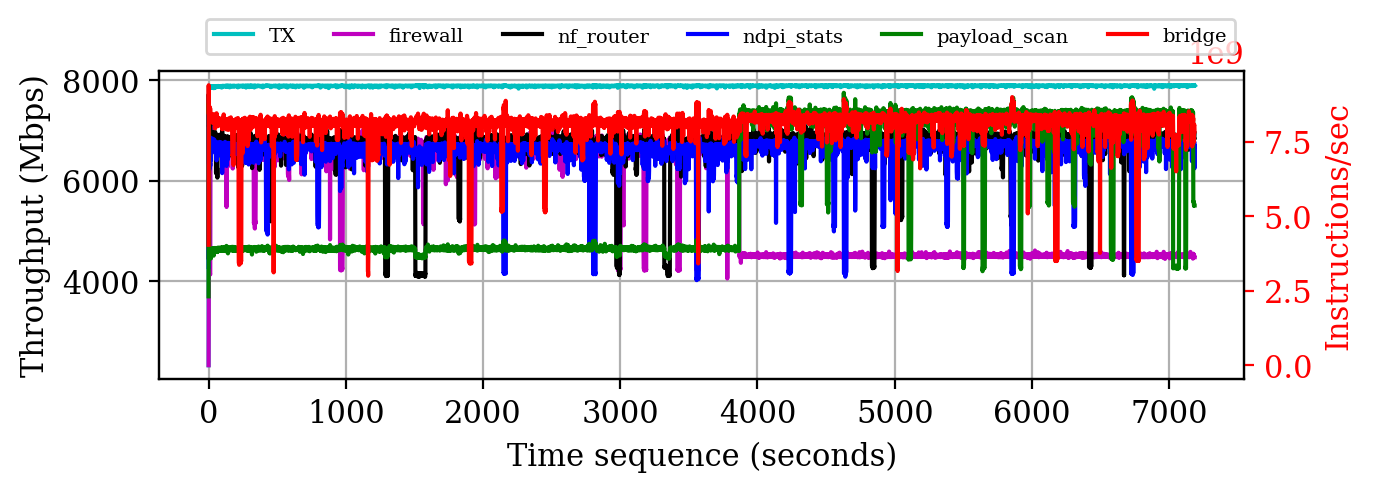

In [14]:
plot_feature("instructions", "Instructions/sec")

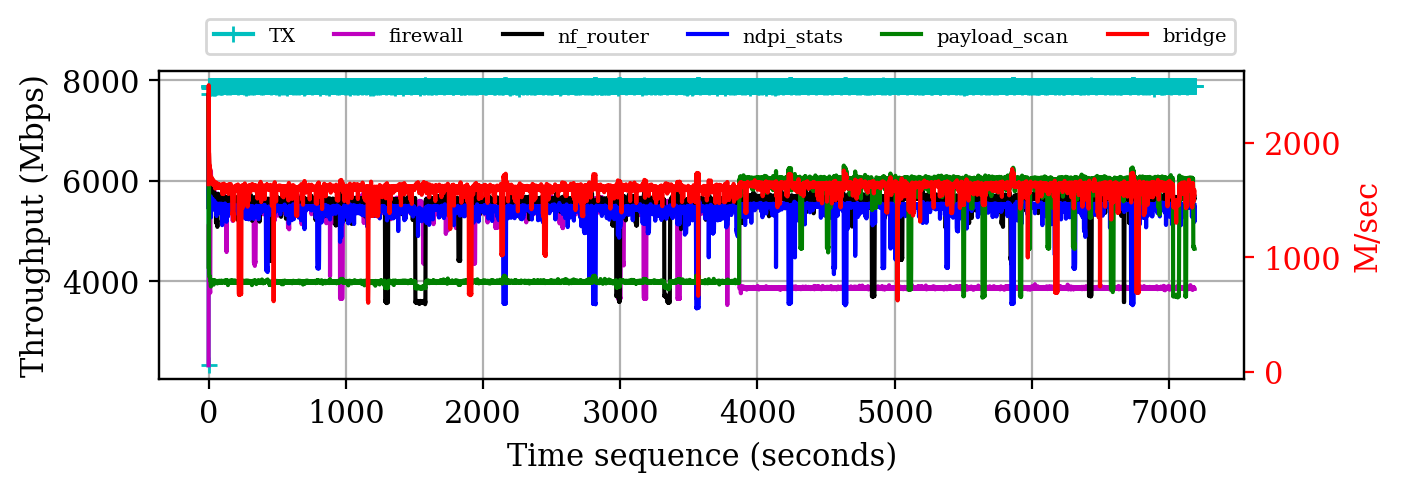

In [15]:
plot_feature("branches,", "M/sec", 7)

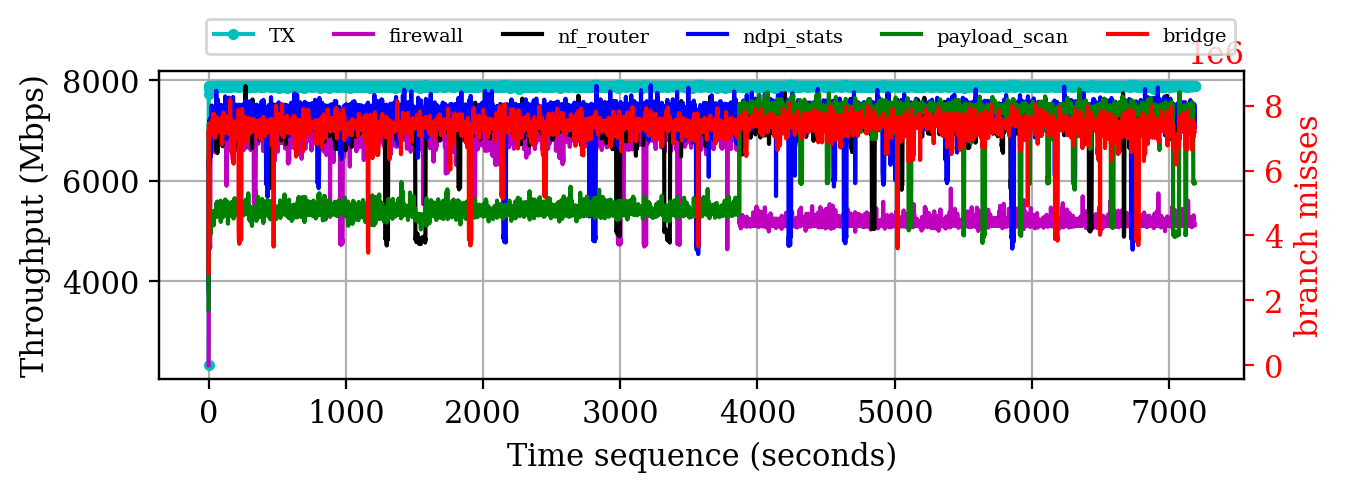

In [16]:
plot_feature("branch-misses,", "branch misses")

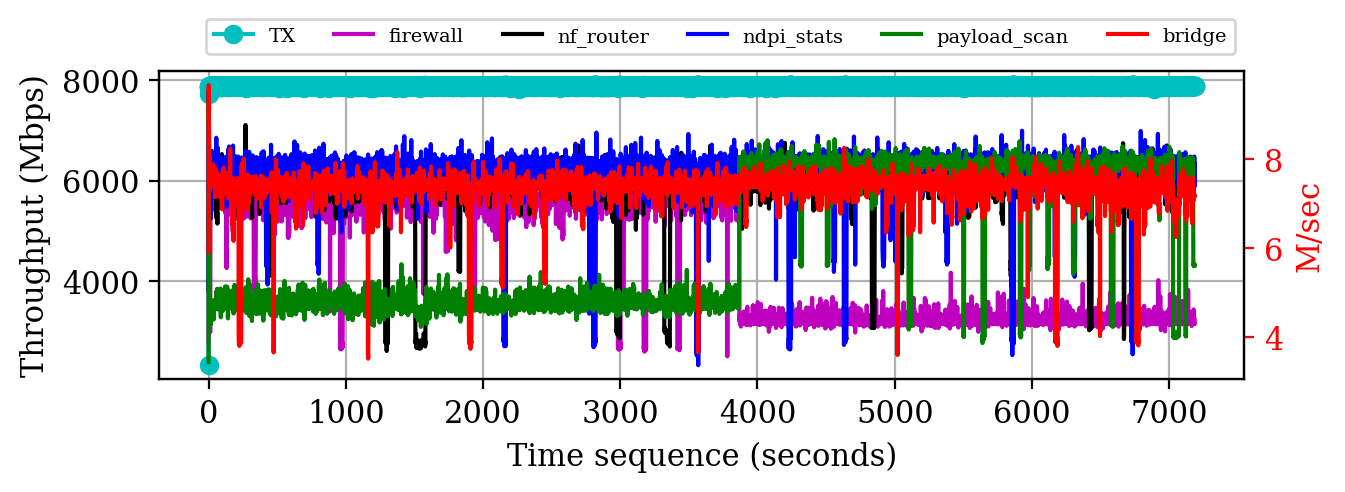

In [17]:
plot_feature("branch-load-misses", "M/sec", 7)

#save figure
folder_path = 'figures/phase_changed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'branch-load-misses-7500.png')
plt.savefig(file_path, bbox_inches='tight')
plt.show()

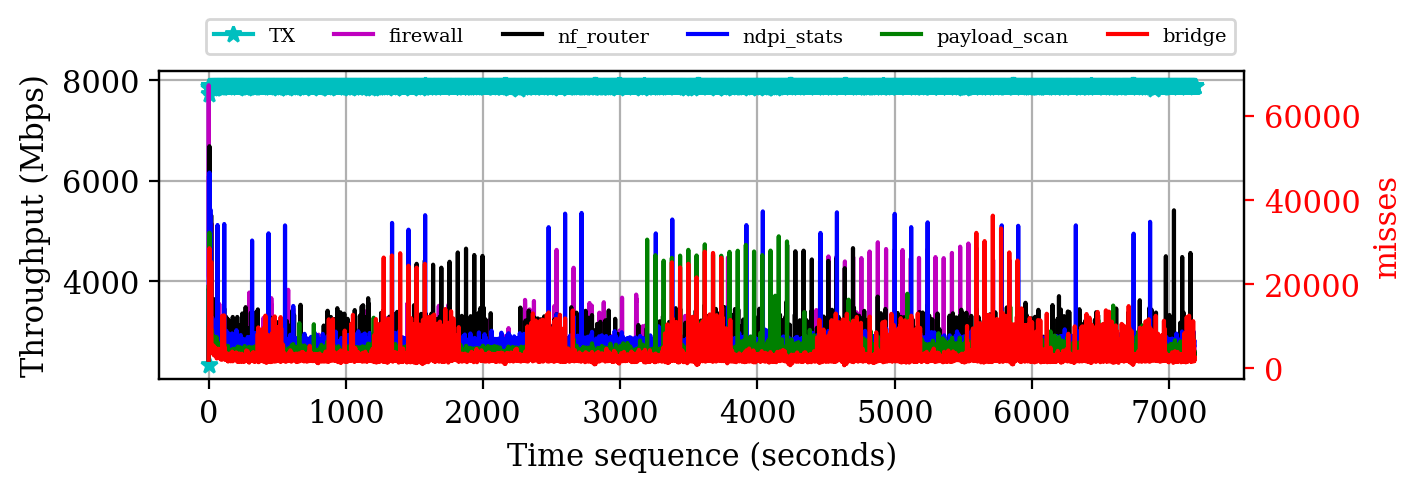

In [18]:
plot_feature("cache-misses", "misses", )

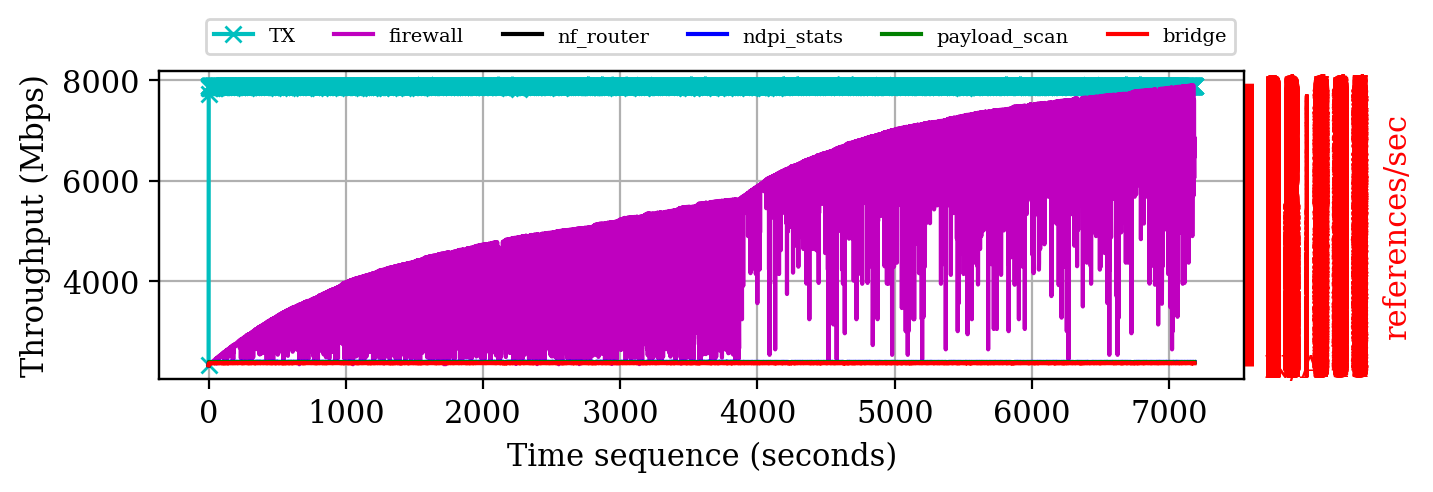

In [19]:
plot_feature("cache-references", "references/sec", 7)

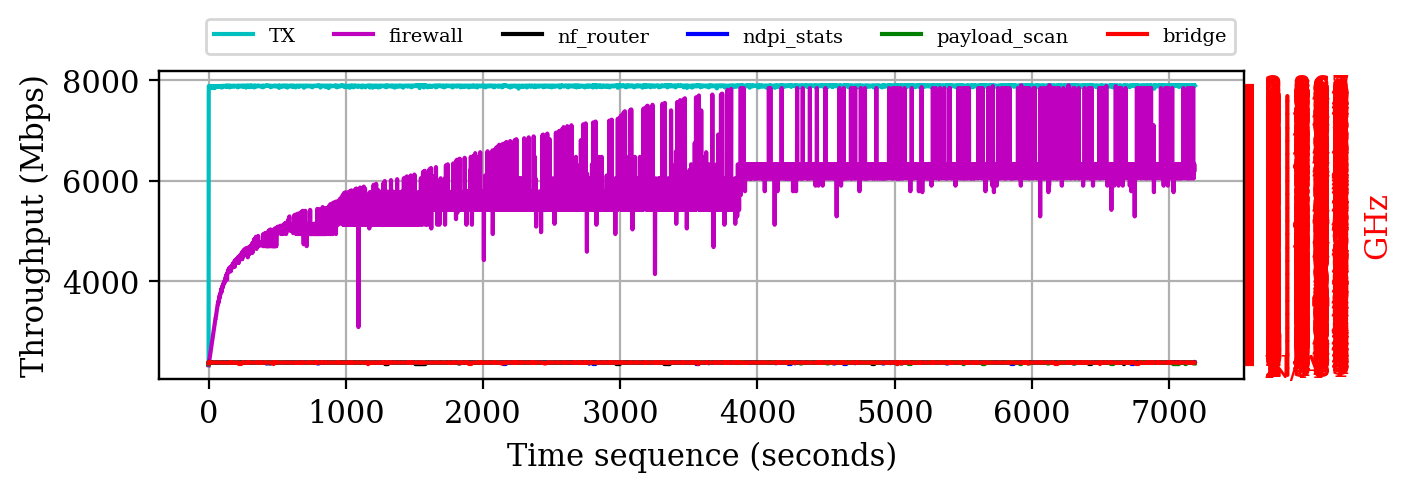

In [20]:
plot_feature(",cycles,", "GHz", 7)

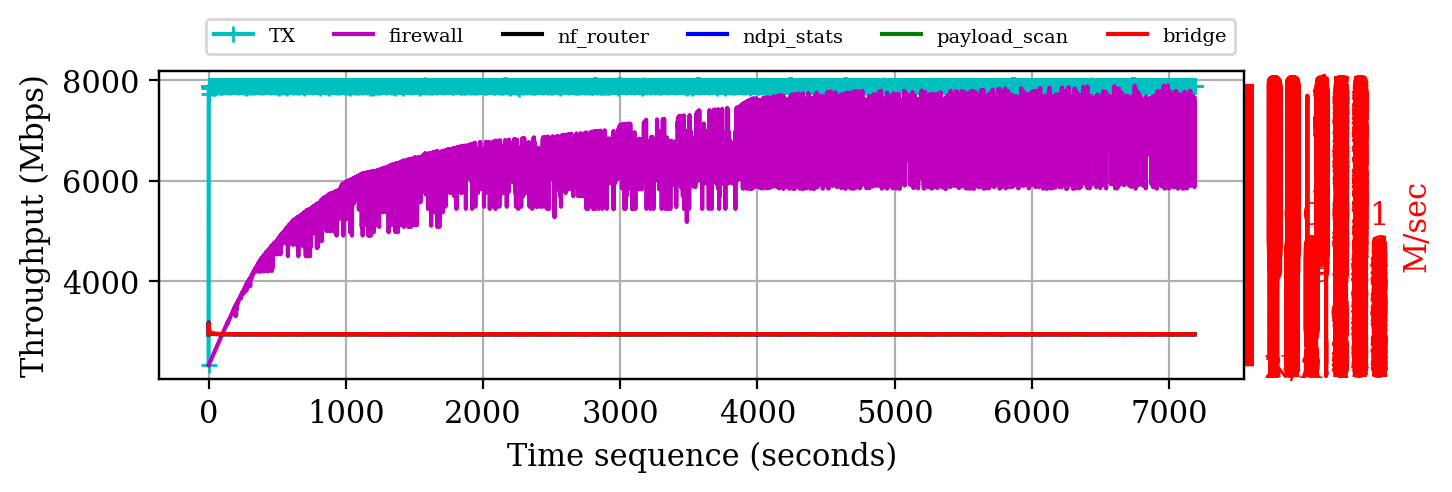

In [21]:
plot_feature("bus-cycles", "M/sec", 7)

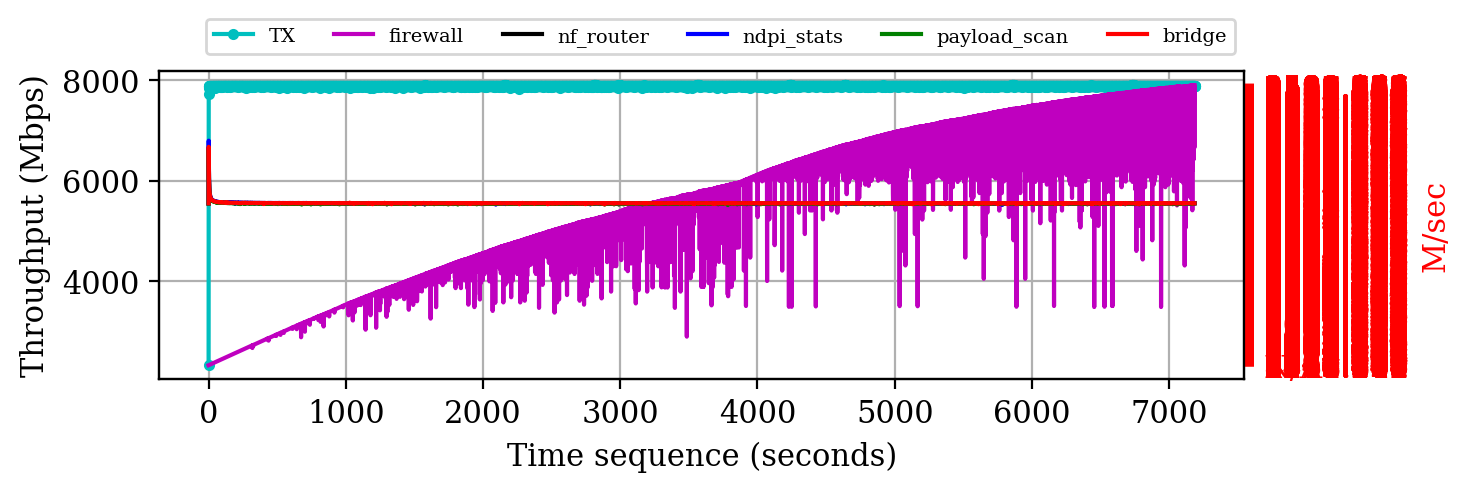

In [22]:
plot_feature("ref-cycles", "M/sec", 7)

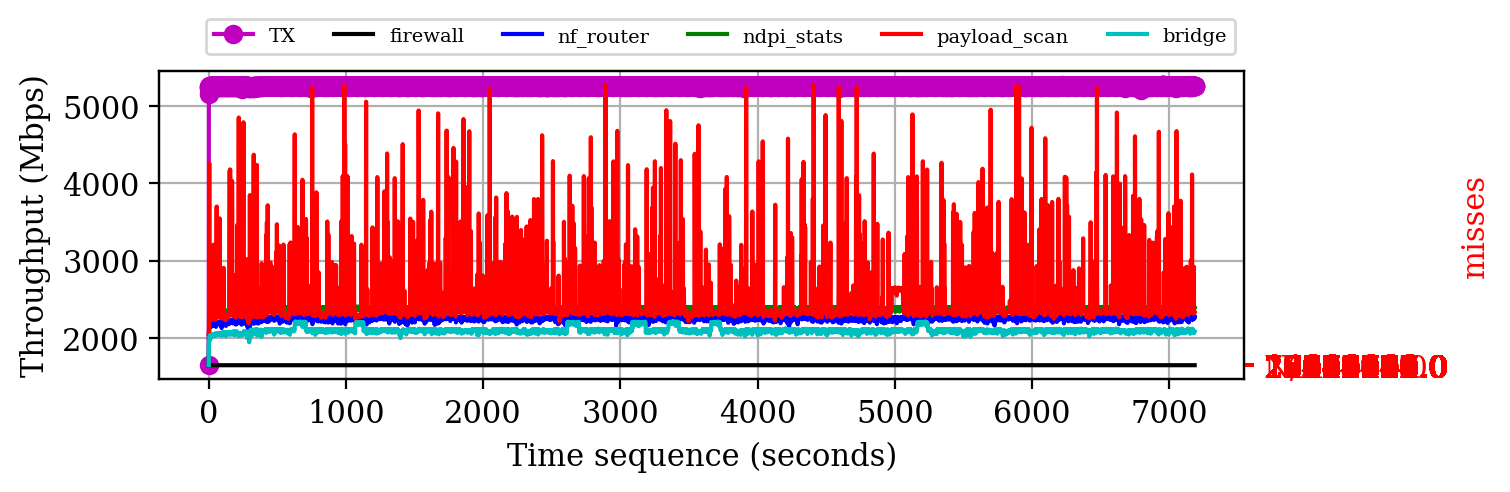

In [43]:
plot_feature("L1-dcache-load-misses", "misses")

In [ ]:
plot_feature("L1-dcache-loads", "M/sec", 7)

In [ ]:
plot_feature("L1-icache-load-misses", "misses", )

In [ ]:
plot_feature("LLC-load-misses", "misses", )

In [ ]:
plot_feature("LLC-store-misses", "misses", )

In [ ]:
plot_feature("LLC-stores", "M/sec", 7)

In [ ]:
plot_feature("LLC-loads", "M/s", 7)

In [ ]:
plot_feature("dTLB-stores", "M/s", 7)

In [ ]:
plot_feature("dTLB-load-misses", "misses",)

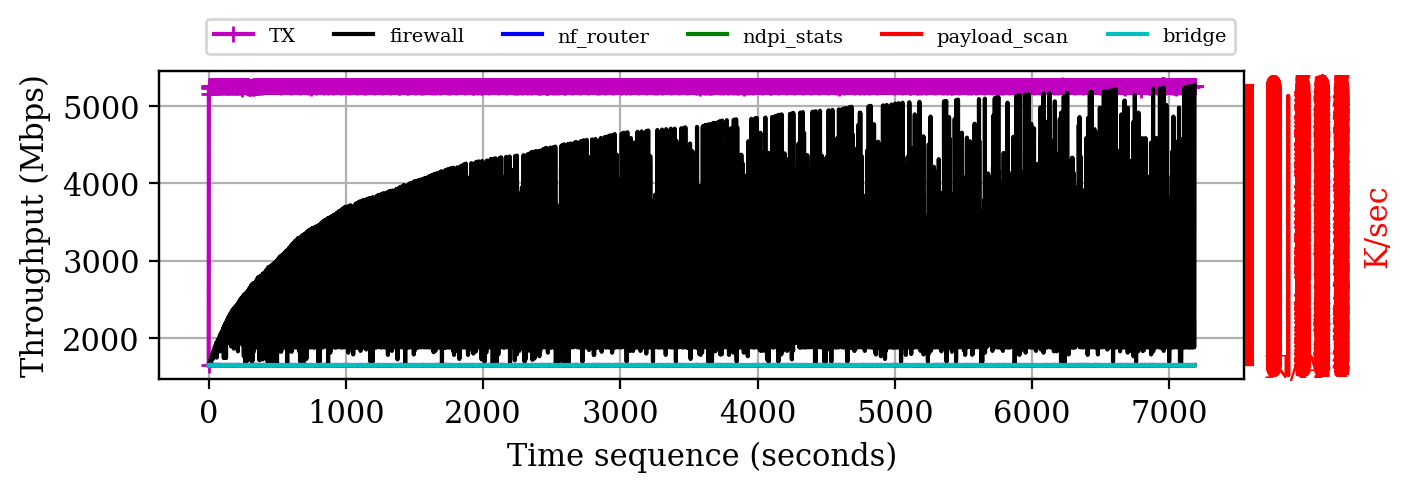

In [34]:
plot_feature("dTLB-store-misses", "K/sec", 7)

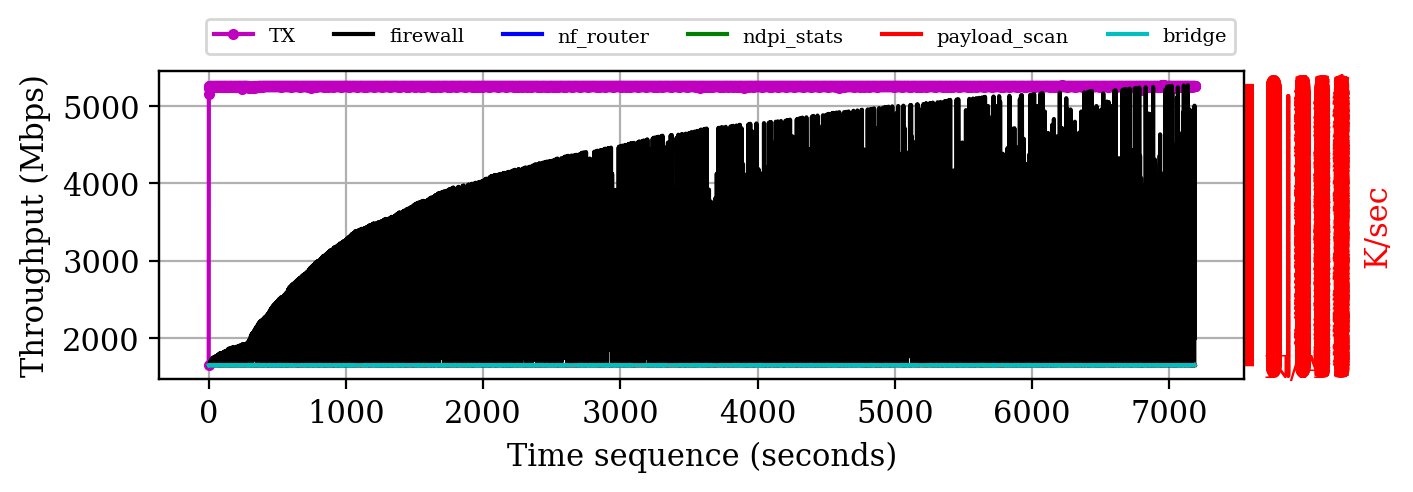

In [35]:
plot_feature("iTLB-loads", "K/sec", 7)

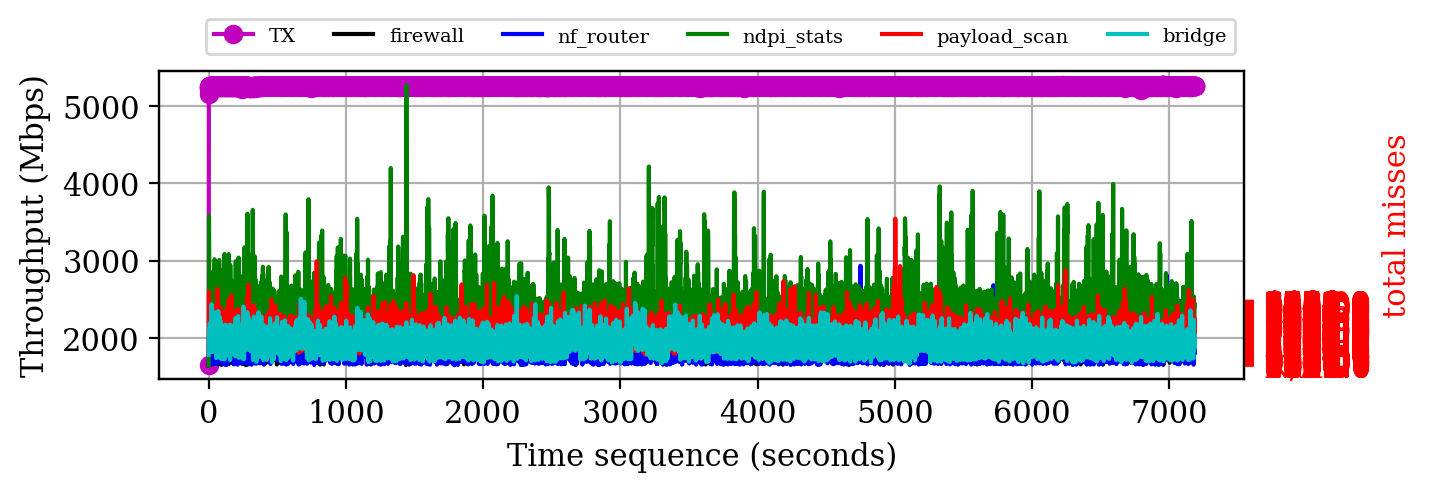

In [36]:
plot_feature("iTLB-load-misses", "total misses",)

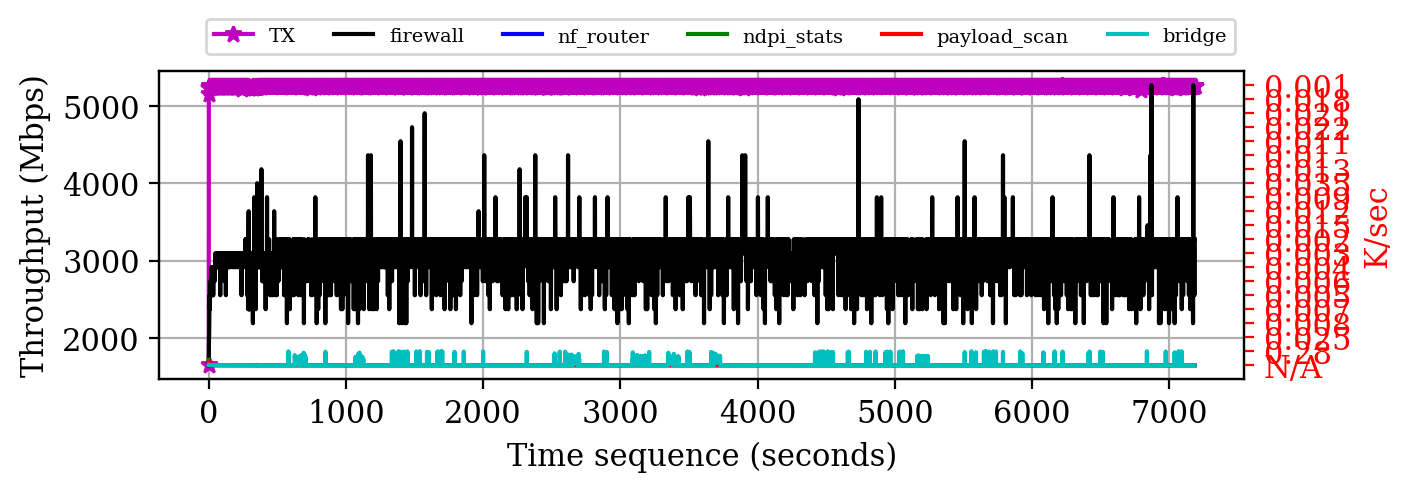

In [37]:
plot_feature("node-loads", "K/sec", 7)

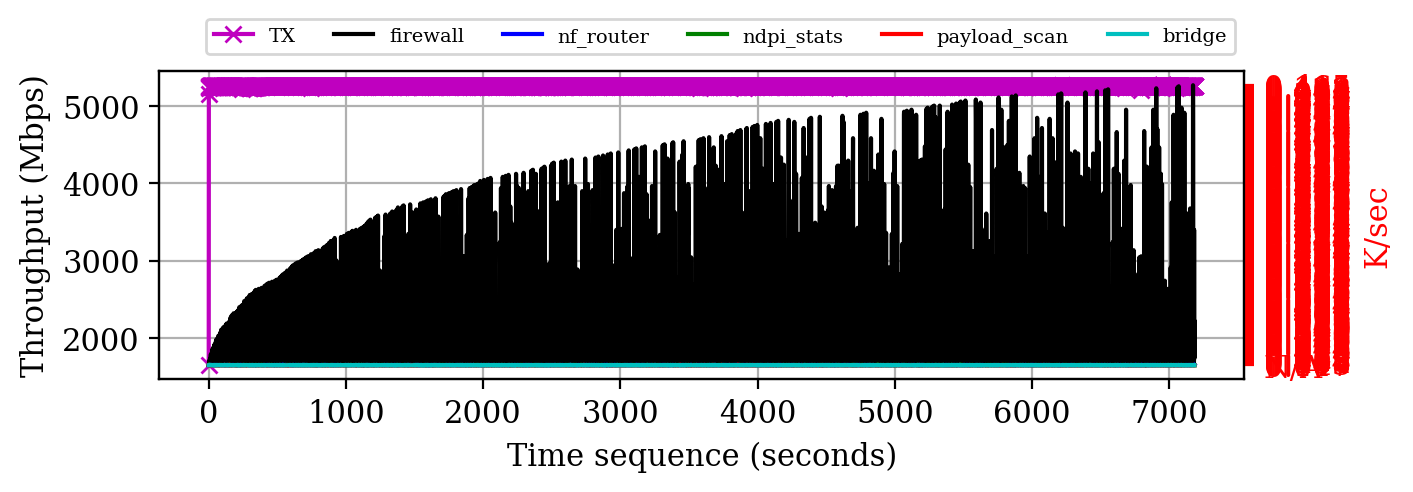

In [38]:
plot_feature("node-store-misses", "K/sec", 7)

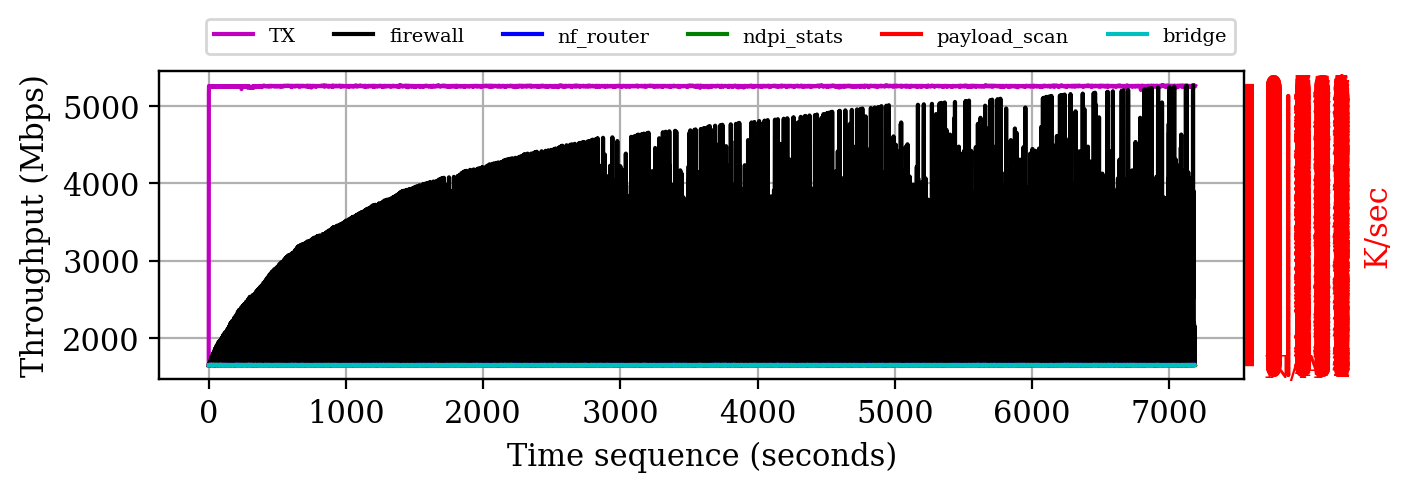

In [39]:
plot_feature("node-stores", "K/sec", 7)

In [15]:
import pandas as pd
fold_path='../linear/load_stimulus_fixed_rate_5000_modified.csv'
data = pd.read_csv(fold_path)#,index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7184 entries, 0 to 7183
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   firewall_instructions               7184 non-null   float64
 1   nf_router_instructions              7184 non-null   float64
 2   ndpi_stats_instructions             7184 non-null   float64
 3   payload_scan_instructions           7184 non-null   float64
 4   bridge_instructions                 7184 non-null   float64
 5   firewall_branches                   7184 non-null   float64
 6   nf_router_branches                  7184 non-null   float64
 7   ndpi_stats_branches                 7184 non-null   float64
 8   payload_scan_branches               7184 non-null   float64
 9   bridge_branches                     7184 non-null   float64
 10  firewall_branch-misses              7184 non-null   float64
 11  nf_router_branch-misses             7184 no

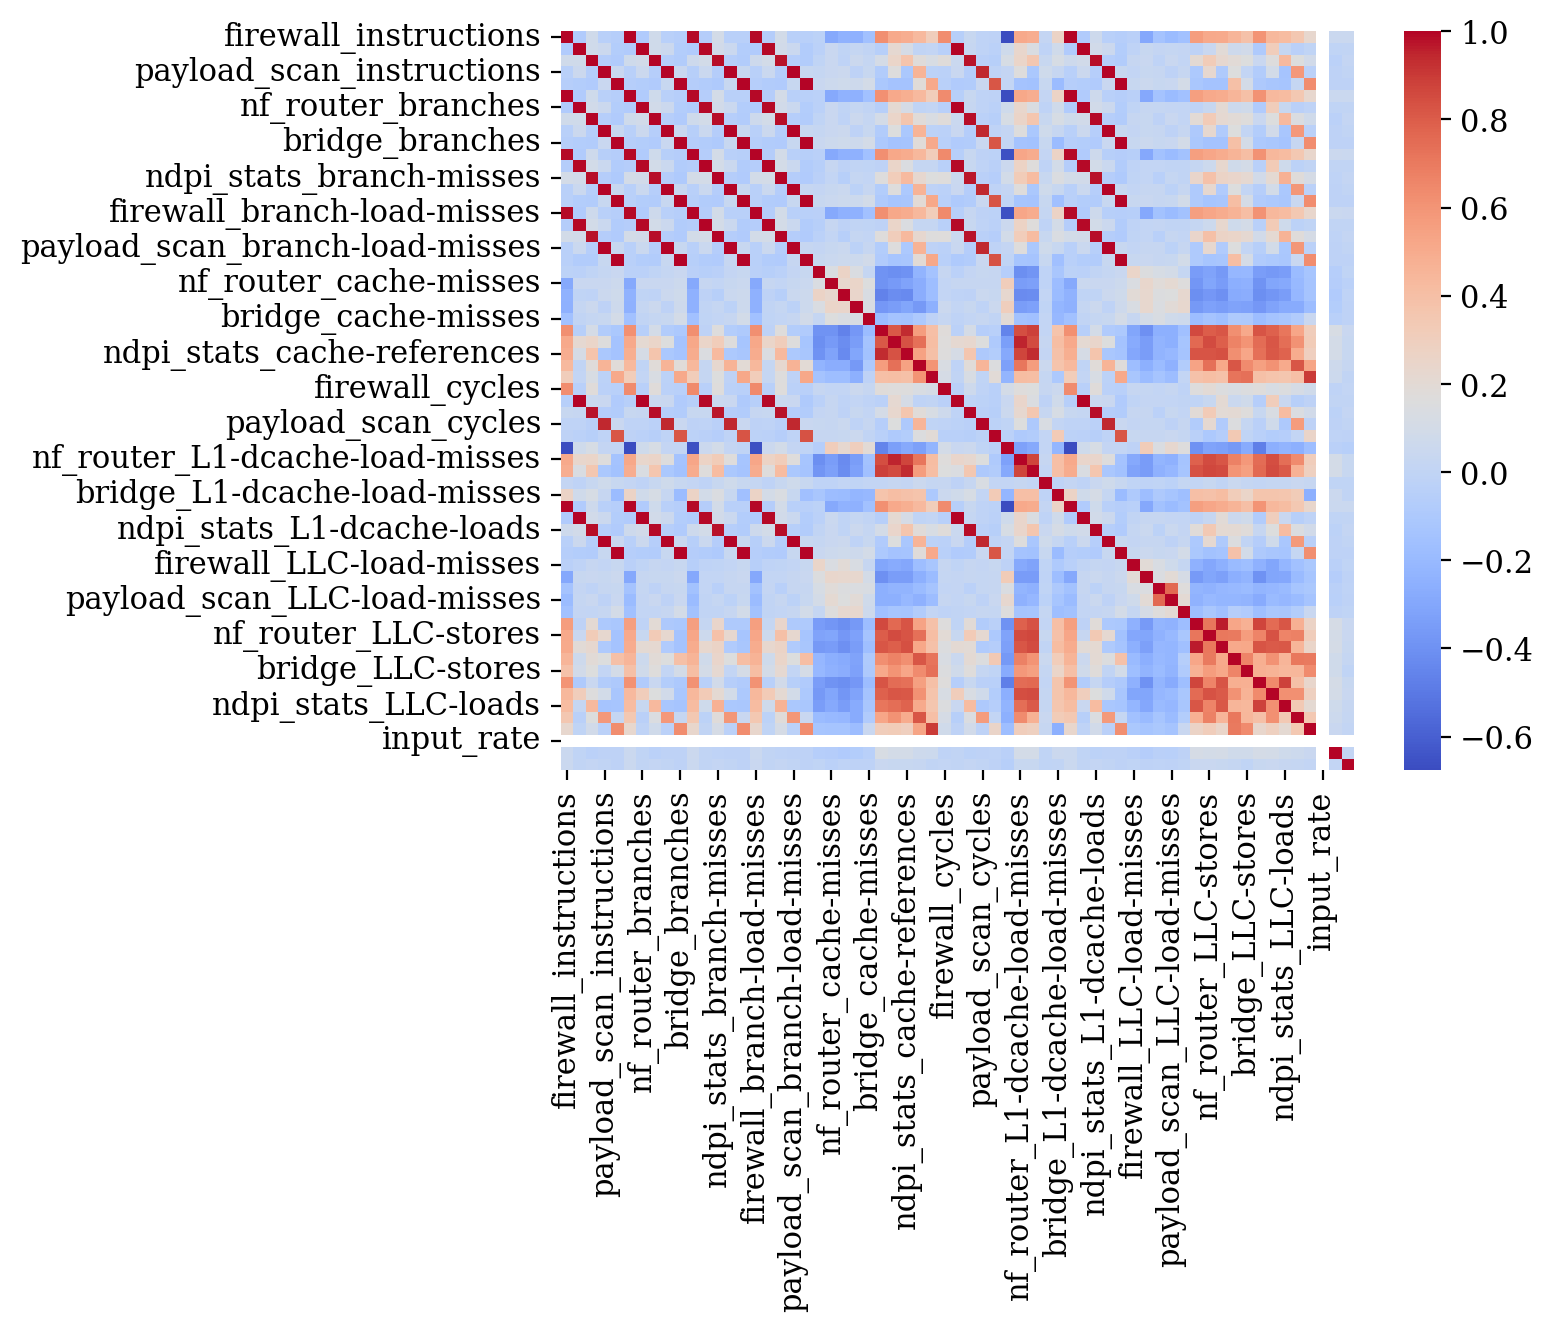

In [16]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")

#save figure
folder_path = 'figures/phase_changed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'heatmap_ls_fixedrate.png')
plt.savefig(file_path, bbox_inches='tight')
plt.show()

In [17]:
from collections import defaultdict

def plot_cor(x, y):
    dict_values = defaultdict(int)
    dict_times = defaultdict(int)

    for i in range(len(x)):
        dict_values[x[i]] += y[i]
        dict_times[x[i]] += 1

    for key in dict_values.keys():
        dict_values[key] = dict_values[key] / dict_times[key]

    new_x = np.array(list(dict_values.keys()))
    new_y = []
    for i in range(len(new_x)):
        new_y.append(dict_values[new_x[i]])

    index = np.argsort(new_x)
    new_x = new_x[index]
    new_y = np.array(new_y)[index]
    return [new_x,new_y]

In [18]:
def generate_list_b(a):
    
    def find_clusters(a, threshold=100):
        clusters = []
        current_cluster = [a[0]]
        for i in range(1, len(a)):
            if abs(a[i] - a[i - 1]) <= threshold:
                current_cluster.append(a[i])
            else:
                clusters.append(current_cluster)
                current_cluster = [a[i]]
        clusters.append(current_cluster)
        return clusters
        print(clusters)
    def average(numbers):
        return sum(numbers) / len(numbers)

    clusters = find_clusters(a)
    b = []
    for cluster in clusters:
        avg = average(cluster)
        b.extend([avg] * len(cluster))
    return b


In [19]:
# linear regression

from sklearn.linear_model import LinearRegression

def linear_regression(a, b):
    # Convert the input lists to numpy arrays
    x = np.array(a)
    y = np.array(b)

    # Reshape the arrays to be 2D
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Create and fit a linear regression model
    model = LinearRegression()
    model.fit(x, y)
    r2 = model.score(x, y)
    # Use the model to make predictions
    y_pred = model.predict(x)

    # Return the predicted values
    return y_pred,r2



In [20]:
# polynomial regression

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


def polynomial_regression(x, y, degree):
    
    # Reshape the arrays to be 2D
    
    x = np.array(x)
    y = np.array(y)

    # Transform the input data into a matrix of polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))

    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    # model score
    r2 = r2_score(y, y_pred)
    # Return the coefficients of the polynomial equation
    return model.coef_,y_pred,r2






## 'instructions'

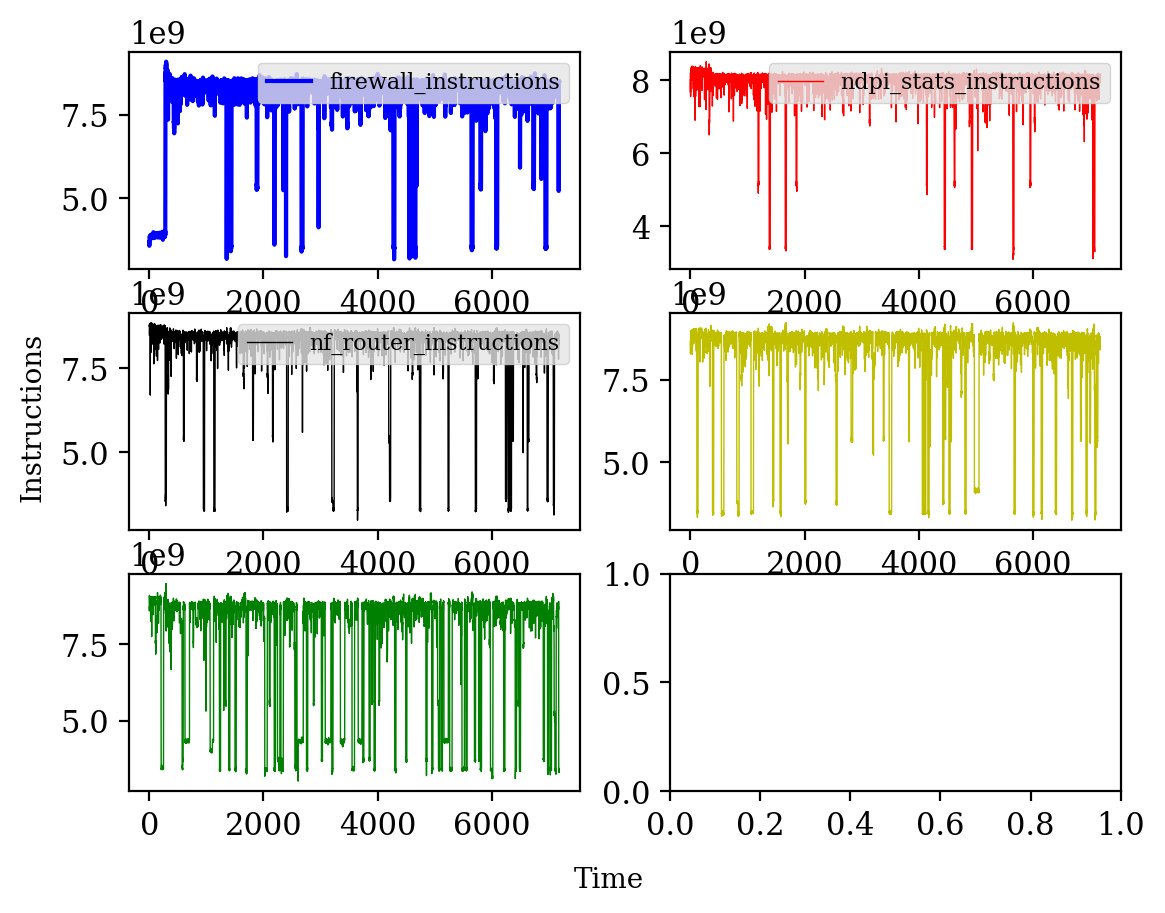

In [21]:
a = list(data['firewall_instructions'])
b = list(data['ndpi_stats_instructions'])
c = list(data['nf_router_instructions'])
d = list(data['payload_scan_instructions'])
e = list(data['bridge_instructions'])

fig, ax = plt.subplots(3, 2)
plt.style.use('ggplot')

l4 = ax[0][0].plot(a, c='b', label='firewall_instructions')
ax[0][0].legend(loc="upper right", fontsize=8)

l4 = ax[0][1].plot(b, c='r', linewidth=.5,label='ndpi_stats_instructions')
ax[0][1].legend(loc="upper right", fontsize=8)

l4 = ax[1][0].plot(c, c='k', linewidth=.5,  label='nf_router_instructions')
ax[1][0].legend(loc="upper right", fontsize=8)


l4 = ax[1][1].plot(d, c='y', linewidth=.5,  label='payload_scan_instructions')
ax[1][0].legend(loc="upper right", fontsize=8)

l4 = ax[2][0].plot(e, c='g', linewidth=.5,  label='bridge_instructions')
ax[1][0].legend(loc="upper right", fontsize=8)



fig.text(0.5, 0.01, "Time", size='10', ha='center')
fig.text(0.04, 0.5, 'Instructions', size='10', va='center', rotation='vertical')


plt.show()

# Address translation: virtual memory

0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.00


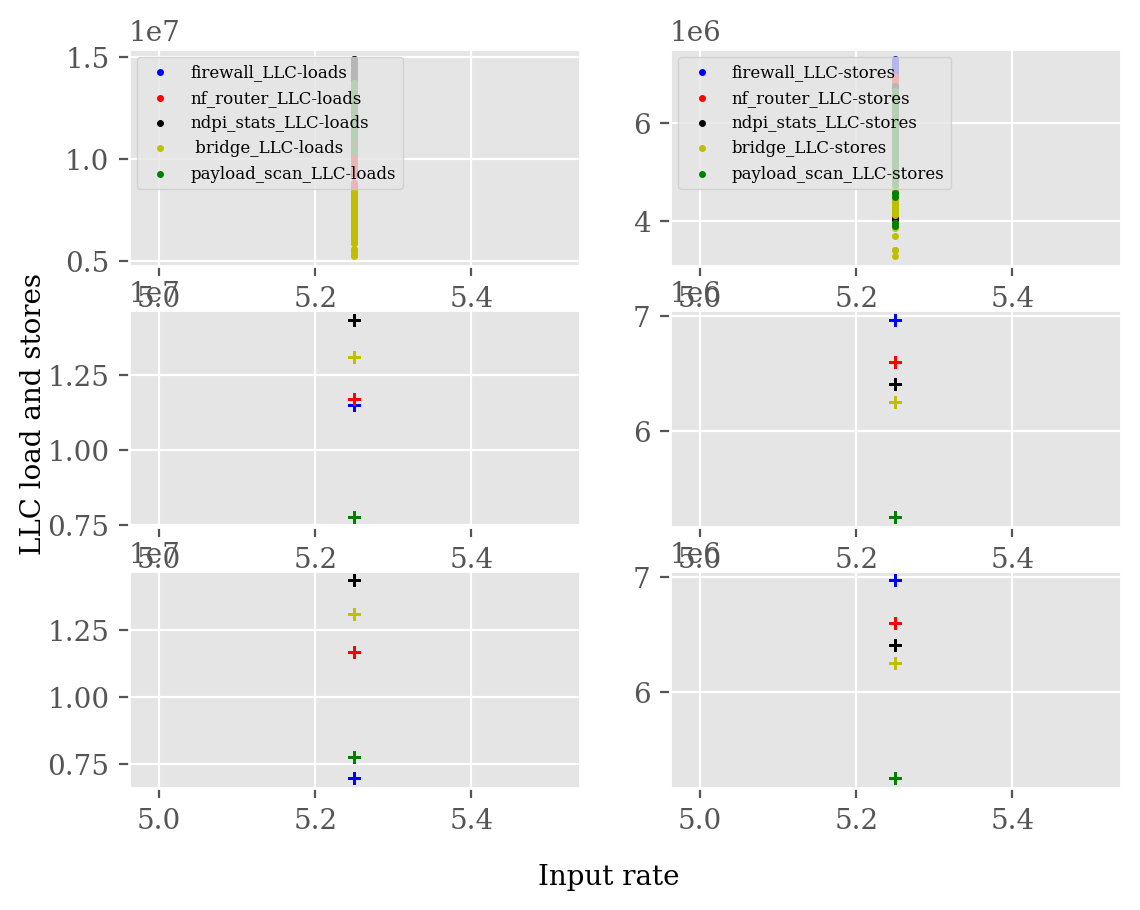

In [31]:
a = list(data['input_rate']/1000)

# LLC-loads
b = list(data['firewall_LLC-loads'])
[a1, b1] = plot_cor(a, b)
e = list(data['nf_router_LLC-loads'])
[a4, e1] = plot_cor(a, e)
f = list(data['ndpi_stats_LLC-loads'])
[a5, f1] = plot_cor(a, f)
g = list(data['bridge_LLC-loads'])
[a6, g1] = plot_cor(a, g)
h = list(data['payload_scan_LLC-loads'])
[a7, h1] = plot_cor(a, h)


# LLC-stores 
i = list(data['firewall_LLC-stores'])
j = list(data['nf_router_LLC-stores'])
k = list(data['ndpi_stats_LLC-stores'])
l = list(data['bridge_LLC-stores'])
m = list(data['payload_scan_LLC-stores'])


y_pred_f,r2_f = linear_regression(list(data['input_rate']),b)
y_pred_nf,r2_nf = linear_regression(list(data['input_rate']), e)
y_pred_ndpi,r2_ndpi = linear_regression(list(data['input_rate']), f)
y_pred_pl,r2_pl = linear_regression(list(data['input_rate']), g)
y_pred_bg,r2_bg = linear_regression(list(data['input_rate']), h)

#fig = plt.figure(figsize=(4, 8)) # adjust the height as needed
fig, ax = plt.subplots(3,2)
plt.style.use('ggplot')

#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[0][0].scatter(a, b, c='b', label='firewall_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, e, c='r', label='nf_router_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, f, c='k', label='ndpi_stats_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, g, c='y', label=' bridge_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, h, c='g', label='payload_scan_LLC-loads', s=4)
ax[0][0].legend(loc="upper left",fontsize =6)


l4 = ax[0][1].scatter(a, i, c='b', label='firewall_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, j, c='r', label='nf_router_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, k, c='k', label='ndpi_stats_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, l, c='y', label='bridge_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, m, c='g', label='payload_scan_LLC-stores', s=4)
ax[0][1].legend(loc="upper left",fontsize =6)




#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[1][0].legend(loc="upper right", fontsize=4)


print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


y_pred_f,r2_f = linear_regression(list(data['input_rate']),i)
y_pred_nf,r2_nf = linear_regression(list(data['input_rate']), j)
y_pred_ndpi,r2_ndpi = linear_regression(list(data['input_rate']), k)
y_pred_pl,r2_pl = linear_regression(list(data['input_rate']), l)
y_pred_bg,r2_bg = linear_regression(list(data['input_rate']), m)


#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[1][1].legend(loc="upper right", fontsize=4)

print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


# polynomial regression
coeffs, y_pred, r2 = polynomial_regression(list(data['input_rate']), b, degree=2)
coeffs_nf, y_pred_nf, r2_nf = polynomial_regression(list(data['input_rate']), e, degree=2)
coeffs_ndpi, y_pred_ndpi, r2_ndpi = polynomial_regression(list(data['input_rate']), list(data['ndpi_stats_LLC-loads']), degree=2)
coeffs_pl, y_pred_pl, r2_pl =polynomial_regression(list(data['input_rate']), list(data['bridge_LLC-loads']), degree=2)
coeffs_bg, y_pred_bg, r2_bg = polynomial_regression(list(data['input_rate']), list(data['payload_scan_LLC-loads']), degree=2)

#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[1][1].legend(loc="upper right", fontsize=6)


print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


# polynomial regression
coeffs, y_pred, r2 = polynomial_regression(list(data['input_rate']), i, degree=2)
coeffs_nf, y_pred_nf, r2_nf = polynomial_regression(list(data['input_rate']), j, degree=2)
coeffs_ndpi, y_pred_ndpi, r2_ndpi = polynomial_regression(list(data['input_rate']), k, degree=2)
coeffs_pl, y_pred_pl, r2_pl =polynomial_regression(list(data['input_rate']), l, degree=2)
coeffs_bg, y_pred_bg, r2_bg = polynomial_regression(list(data['input_rate']), m, degree=2)

#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[2][1].legend(loc="upper right", fontsize=6)


print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")










fig.text(0.5, 0.01, "Input rate", size='10', ha='center')
fig.text(0.04, 0.5, 'LLC load and stores', size='10', va='center', rotation='vertical')
# add label outside the figure
#fig.text(1.05, 0.5, 'Label Text', va='center', rotation='vertical')

plt.show()

# principal component analysis

445408
(7184, 2)


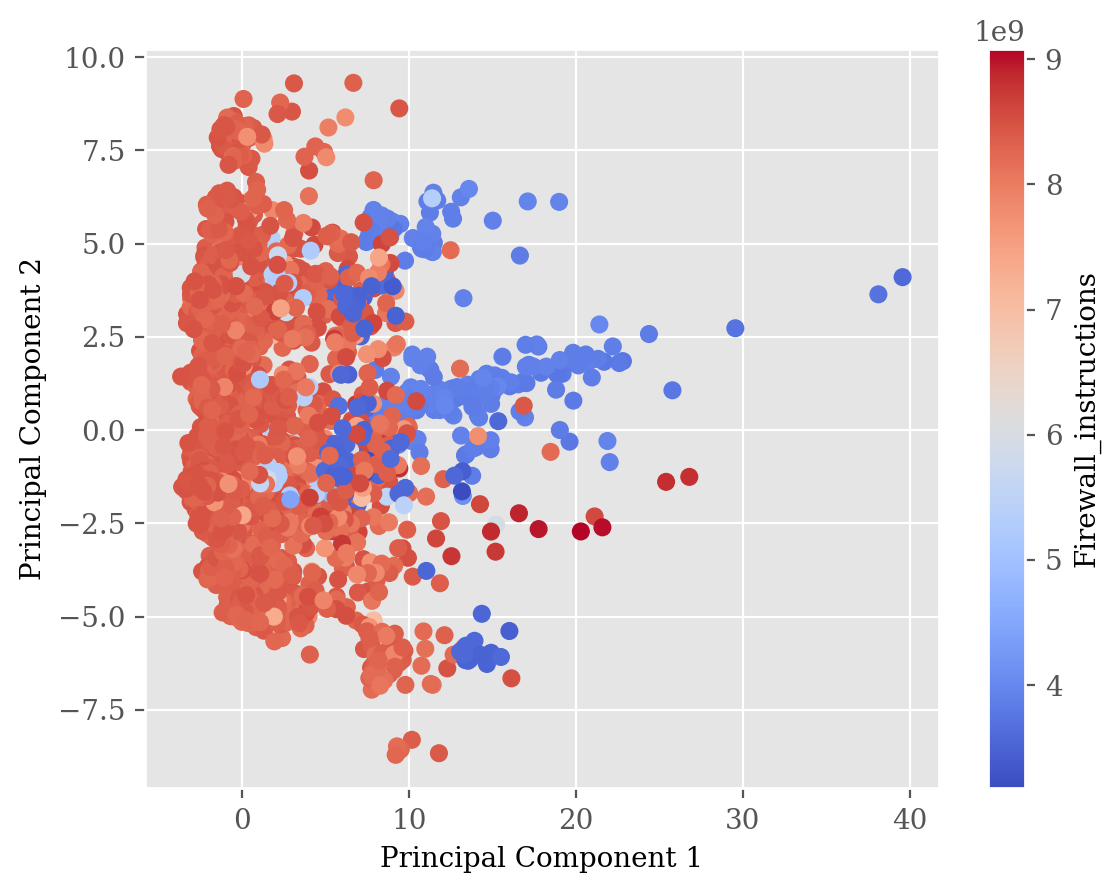

Eigenvectors:
 [[-0.  -0.1 -0.   0.  -0.2 -0.  -0.1 -0.   0.  -0.2 -0.  -0.1 -0.   0.
  -0.2 -0.  -0.1 -0.   0.   0.1  0.1  0.1  0.1  0.  -0.2 -0.2 -0.2 -0.2
  -0.1 -0.1 -0.  -0.1 -0.   0.   0.1 -0.2 -0.2 -0.  -0.1 -0.2 -0.  -0.1
  -0.   0.   0.1  0.1  0.1  0.1  0.  -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2
  -0.2 -0.2 -0.1  0.  -0.  -0. ]
 [ 0.1  0.1 -0.2 -0.3 -0.   0.1  0.1 -0.2 -0.3 -0.   0.1  0.1 -0.2 -0.3
  -0.   0.1  0.1 -0.2 -0.3 -0.   0.  -0.   0.  -0.  -0.   0.   0.1 -0.2
  -0.2  0.   0.1  0.1 -0.2 -0.2  0.1  0.   0.1 -0.   0.  -0.   0.1  0.1
  -0.2 -0.3  0.   0.   0.   0.  -0.   0.  -0.   0.1 -0.2 -0.1 -0.   0.
   0.1 -0.1 -0.2  0.  -0.   0. ]]
Eigenvalues:
 [15.3  7.4]
-6.245004513516506e-17


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data into a Pandas dataframe
df = pd.read_csv("load_stimulus_fixed_rate_5000_modified.csv")#,index_col=0)
df = df.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'firewall_instructions'
#target_col = 'nf_router_instructions'
#target_col = 'bridge_instructions'

independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col]



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
pca = PCA()
pca.n_components =2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))
# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Firewall_instructions')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Print the eigenvectors and eigenvalues with one decimal place
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
c=np.dot(pca.components_[0],pca.components_[1])
print("Eigenvectors:\n", np.round(pca.components_, 1))
print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))
print(c)


445408
(7184, 5)


Text(0, 0.5, 'Principal Component 2')

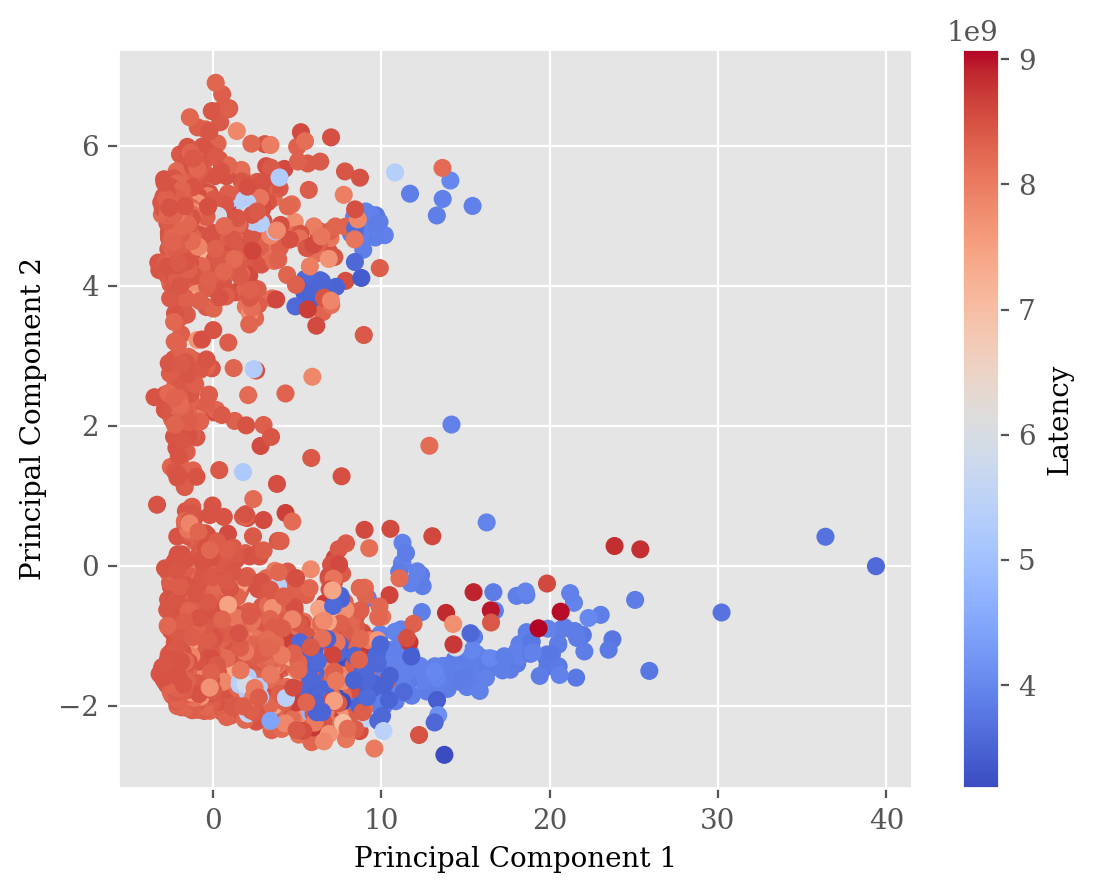

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler


# Load CSV data into a Pandas dataframe
df = pd.read_csv("load_stimulus_fixed_rate_5000_modified.csv")#,index_col=0)
df = df.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'
target_col = 'firewall_instructions'
independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col]#.div(1000)




# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
# Create a Sparse PCA object with 2 components
spca = SparsePCA(n_components=5, alpha =10)


# Fit the Sparse PCA model to the data
spca.fit(independent_variables_scaled)

# Transform the data into the reduced-dimension representation
X_spca = spca.transform(independent_variables_scaled)

independent_variables_pca = spca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))


# Get the explained variance ratio
cov_matrix = np.cov(independent_variables_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)



# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Latency')





plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')





dependent_variable:8614352.0
3433528.0
8614352.0
445408
(7184, 2)


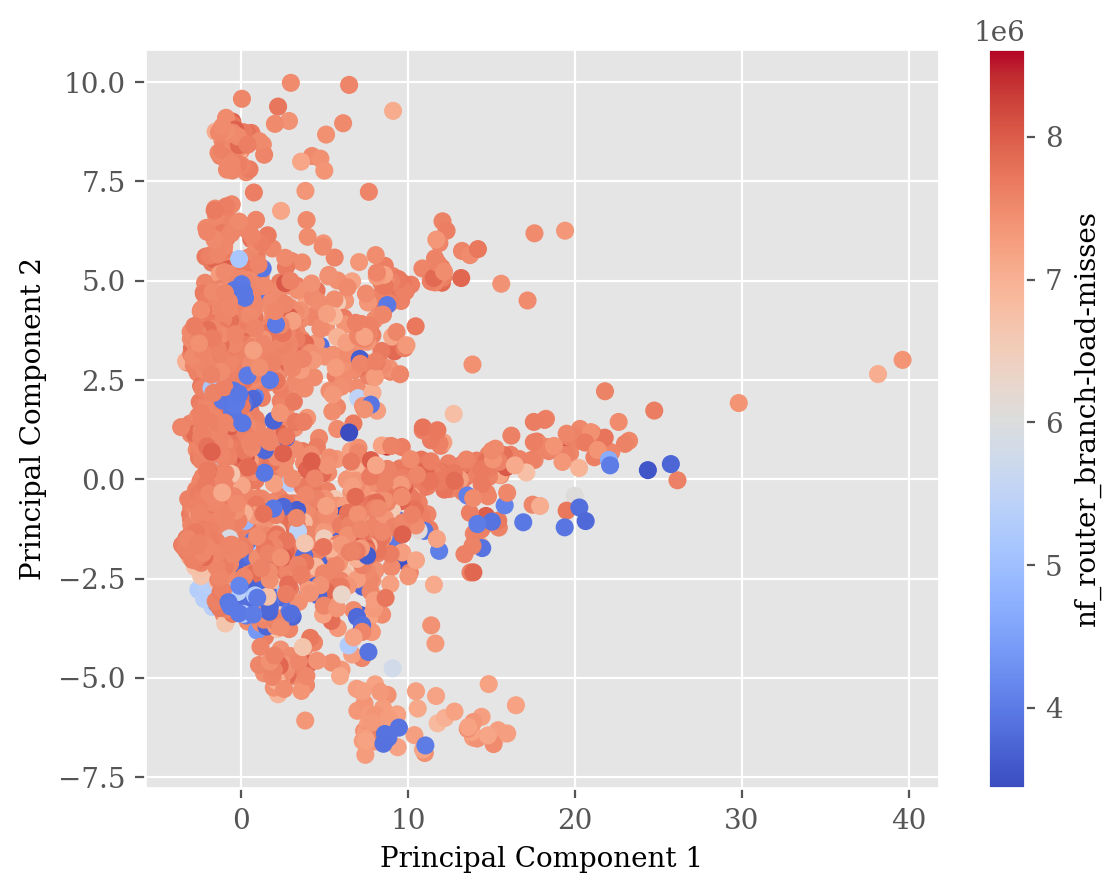

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data 

df = pd.read_csv("load_stimulus_fixed_rate_5000_modified.csv")#,index_col=0)
df = df.replace(['<not counted>'], np.nan)
# Separate the target column from the other columns
target_col = 'nf_router_branch-load-misses'

independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col]


print(f'dependent_variable:{max(dependent_variable)}')

print(min(df[target_col]))
print(max(df[target_col]))

# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
pca = PCA()
pca.n_components = 2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))

# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label(target_col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.show()

# Cosine similarity (rate classification)

In [22]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


# Read the CSV file
df = pd.read_csv("load_stimulus_fixed_rate_5000_modified.csv")
df = df.replace(['<not counted>'], np.nan)

df1 = pd.read_csv("load_stimulus_fixed_rate_7500_modified.csv")
df1 = df1.replace(['<not counted>'], np.nan)

# Separate the features and target variable
X = df.drop(['input_rate','output_rate','latency'], axis=1)
y = df['input_rate']
X1 = df1.drop(['input_rate','output_rate','latency'], axis=1)
y1 = df1['input_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

# generate V_R
V_R_5000 = X_train.mean()
V_R_7500 = X1_train.mean()


In [23]:
# Define two standard arrays for two types
type1 = V_R_5000.values
type2 = V_R_7500.values


type1 = type1.reshape(1,-1)
type2 = type2.reshape(1,-1)

# Define the function to classify a batch of data

def classify_batch(batch_data):
    if not isinstance(batch_data, np.ndarray):
        batch_data = np.array(batch_data)
    batch_data = batch_data.reshape(1, -1)
    cos_sim1 = cosine_similarity(batch_data, type1)
    cos_sim2 = cosine_similarity(batch_data, type2)

    # Determine which standard array has the higher cosine similarity for each row of the batch
    predictions = np.argmax(np.column_stack((cos_sim1, cos_sim2)), axis=1) + 1
    return predictions

print(type1)
print(type2)

[[8.06086959e+09 8.14896621e+09 7.87937855e+09 8.19095144e+09
  7.55028067e+09 1.59241745e+09 1.61306449e+09 1.54180945e+09
  1.62354589e+09 1.48635872e+09 7.00199038e+06 7.37079123e+06
  7.55429990e+06 7.20824727e+06 6.61279895e+06 7.00434568e+06
  7.37149948e+06 7.55573162e+06 7.21259767e+06 6.61603466e+06
  4.32272255e+03 4.28766766e+03 4.28663405e+03 3.77149483e+03
  3.15974821e+03 1.85486536e+07 1.83498728e+07 2.08139953e+07
  1.94078489e+07 1.30478906e+07 2.83982128e+09 2.78447411e+09
  2.83996992e+09 2.71587635e+09 2.62320336e+09 1.94904873e+07
  1.87464214e+07 2.24579813e+07 2.37982330e+07 1.39932905e+07
  2.48492496e+09 2.50887632e+09 2.43442804e+09 2.52618875e+09
  2.32682213e+09 3.44445346e+03 2.79239220e+03 3.45528560e+03
  2.91549761e+03 1.87038982e+03 6.97392180e+06 6.60213184e+06
  6.41417298e+06 6.25410371e+06 5.25150843e+06 1.15095533e+07
  1.16849132e+07 1.43412575e+07 1.31073239e+07 7.75262804e+06]]
[[5.61112088e+09 7.40675349e+09 7.21021298e+09 5.85636377e+09
  8.09

In [24]:
import numpy as np

# classfication rate 5k
true_labels =  np.ones(len(test_set))
true_labels = np.array(true_labels)
# Initialize the success_count and total_count
success_count = 0
total_count = 0

# Process the data in batches and classify each batch
batch_size = 1
test_set = X_test
for i, batch_data in enumerate(batch_generator(test_set, batch_size)):
    batch_predictions = classify_batch(batch_data)
    success_count += np.sum(batch_predictions == true_labels[i])
    total_count += len(batch_data)

# Calculate the classification accuracy
accuracy = success_count / total_count

print(f'Rate prediction accuracy: {accuracy}')

# classfication rate 7.5k
true_labels = 2* np.ones(len(test_set))
true_labels = np.array(true_labels)

# Initialize the success_count and total_count
success_count = 0
total_count = 0

# Process the data in batches and classify each batch
batch_size = 1
test_set = X1_test
for i, batch_data in enumerate(batch_generator(test_set, batch_size)):
    batch_predictions = classify_batch(batch_data)
    success_count += np.sum(batch_predictions == true_labels[i])
    total_count += len(batch_data)

# Calculate the classification accuracy
accuracy = success_count / total_count

print(f'Rate prediction accuracy: {accuracy}')


NameError: name 'test_set' is not defined

# Cosine similarity (VNF classification)

In [32]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv("load_stimulus_fixed_rate_5000_modified.csv")
df = df.replace(['<not counted>'], np.nan)

df1 = pd.read_csv("load_stimulus_fixed_rate_7500_modified.csv")
df1 = df1.replace(['<not counted>'], np.nan)

# Separate the features and target variable
X = df.drop(['input_rate','output_rate','latency'], axis=1)
y = df['input_rate']
X1 = df1.drop(['input_rate','output_rate','latency'], axis=1)
y1 = df1['input_rate']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)


# generate V_R
V_R_5000 = X_train.mean()
V_R_7500 = X1_train.mean()

In [33]:
# generate V_R
V_R_5000 = X_train.mean()
V_R_7500 = X1_train.mean()


# generate V_R_vnf
I=[]
for i in range(0,60,5):
    I.append(i)
indices = I

# Initialize empty lists for each sub-dataset
V_R_5000_fw = []
V_R_5000_nv = []
V_R_5000_ndpi = []
V_R_5000_pl = []
V_R_5000_br = []

V_R_7500_fw = []
V_R_7500_nv = []
V_R_7500_ndpi = []
V_R_7500_pl = []
V_R_7500_br = []
for i, (key, value) in enumerate(V_R_7500.items()):
    if i in indices:
        V_R_7500_fw.append(value)
    elif i-1 in indices:
        V_R_7500_nv.append(value)
    elif i-2 in indices:
        V_R_7500_ndpi.append(value)
    elif i-3 in indices:
        V_R_7500_pl.append(value)
    elif i-4 in indices:
        V_R_7500_br.append(value)

for i, (key, value) in enumerate(V_R_5000.items()):
    if i in indices:
        V_R_5000_fw.append(value)
    elif i-1 in indices:
        V_R_5000_nv.append(value)
    elif i-2 in indices:
        V_R_5000_ndpi.append(value)
    elif i-3 in indices:
        V_R_5000_pl.append(value)
    elif i-4 in indices:
        V_R_5000_br.append(value)

# Define 10 standard arrays for two types
type1_fw = np.array(V_R_5000_fw)
print(type1_fw )
type1_nv = np.array(V_R_5000_nv)
type1_ndpi = np.array(V_R_5000_ndpi)
type1_pl = np.array(V_R_5000_pl)
type1_br =np.array( V_R_5000_br)
type2_fw =np.array( V_R_7500_fw)
type2_nv = np.array(V_R_7500_nv)
type2_ndpi = np.array(V_R_7500_ndpi)
type2_pl = np.array(V_R_7500_pl)
type2_br = np.array(V_R_7500_br)

type1_fw  = type1_fw.reshape(1,-1)
type1_nv  = type1_nv.reshape(1,-1)
type1_ndpi  = type1_ndpi.reshape(1,-1)
type1_pl  = type1_pl.reshape(1,-1)
type1_br  = type1_br.reshape(1,-1)


type2_fw  = type2_fw.reshape(1,-1)
type2_nv  = type2_nv.reshape(1,-1)
type2_ndpi  = type2_ndpi.reshape(1,-1)
type2_pl  = type2_pl.reshape(1,-1)
type2_br  = type2_br.reshape(1,-1)

[8.05898659e+09 1.59191506e+09 7.00020672e+06 7.00185765e+06
 4.32065686e+03 1.85493482e+07 2.84065053e+09 1.95042752e+07
 2.48376504e+09 3.45337567e+03 6.97491341e+06 1.15096502e+07]


In [34]:
# seperate X_test,X1_test into 5 subsets

# Create a list of dataframes, each containing 5 columns from the original dataframe
df_list = [X_test.iloc[:, i:i+5] for i in range(0, 60, 5)]
I=[]
for i in range(0,60,5):
    I.append(i)
X_test_fw = X_test.iloc[:,I]
X1_test_fw = X1_test.iloc[:,I]

I= [x + 1 for x in I]
X_test_nv = X_test.iloc[:,I]
X1_test_nv = X1_test.iloc[:,I]

I= [x + 1 for x in I]
X_test_ndpi = X_test.iloc[:,I]
X1_test_ndpi = X1_test.iloc[:,I]

I= [x + 1 for x in I]
X_test_pl = X_test.iloc[:,I]
X1_test_pl = X1_test.iloc[:,I]

I= [x + 1 for x in I]
X_test_br = X_test.iloc[:,I]
X1_test_br = X1_test.iloc[:,I]

# plot V_R

C:\Users\Qiong\AppData\Local\Temp\ipykernel_21060\604068844.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.5, h_pad=2.5, w_pad=2.5)
C:\Users\Qiong\AppData\Local\Temp\ipykernel_21060\604068844.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.5, h_pad=2.5, w_pad=2.5)


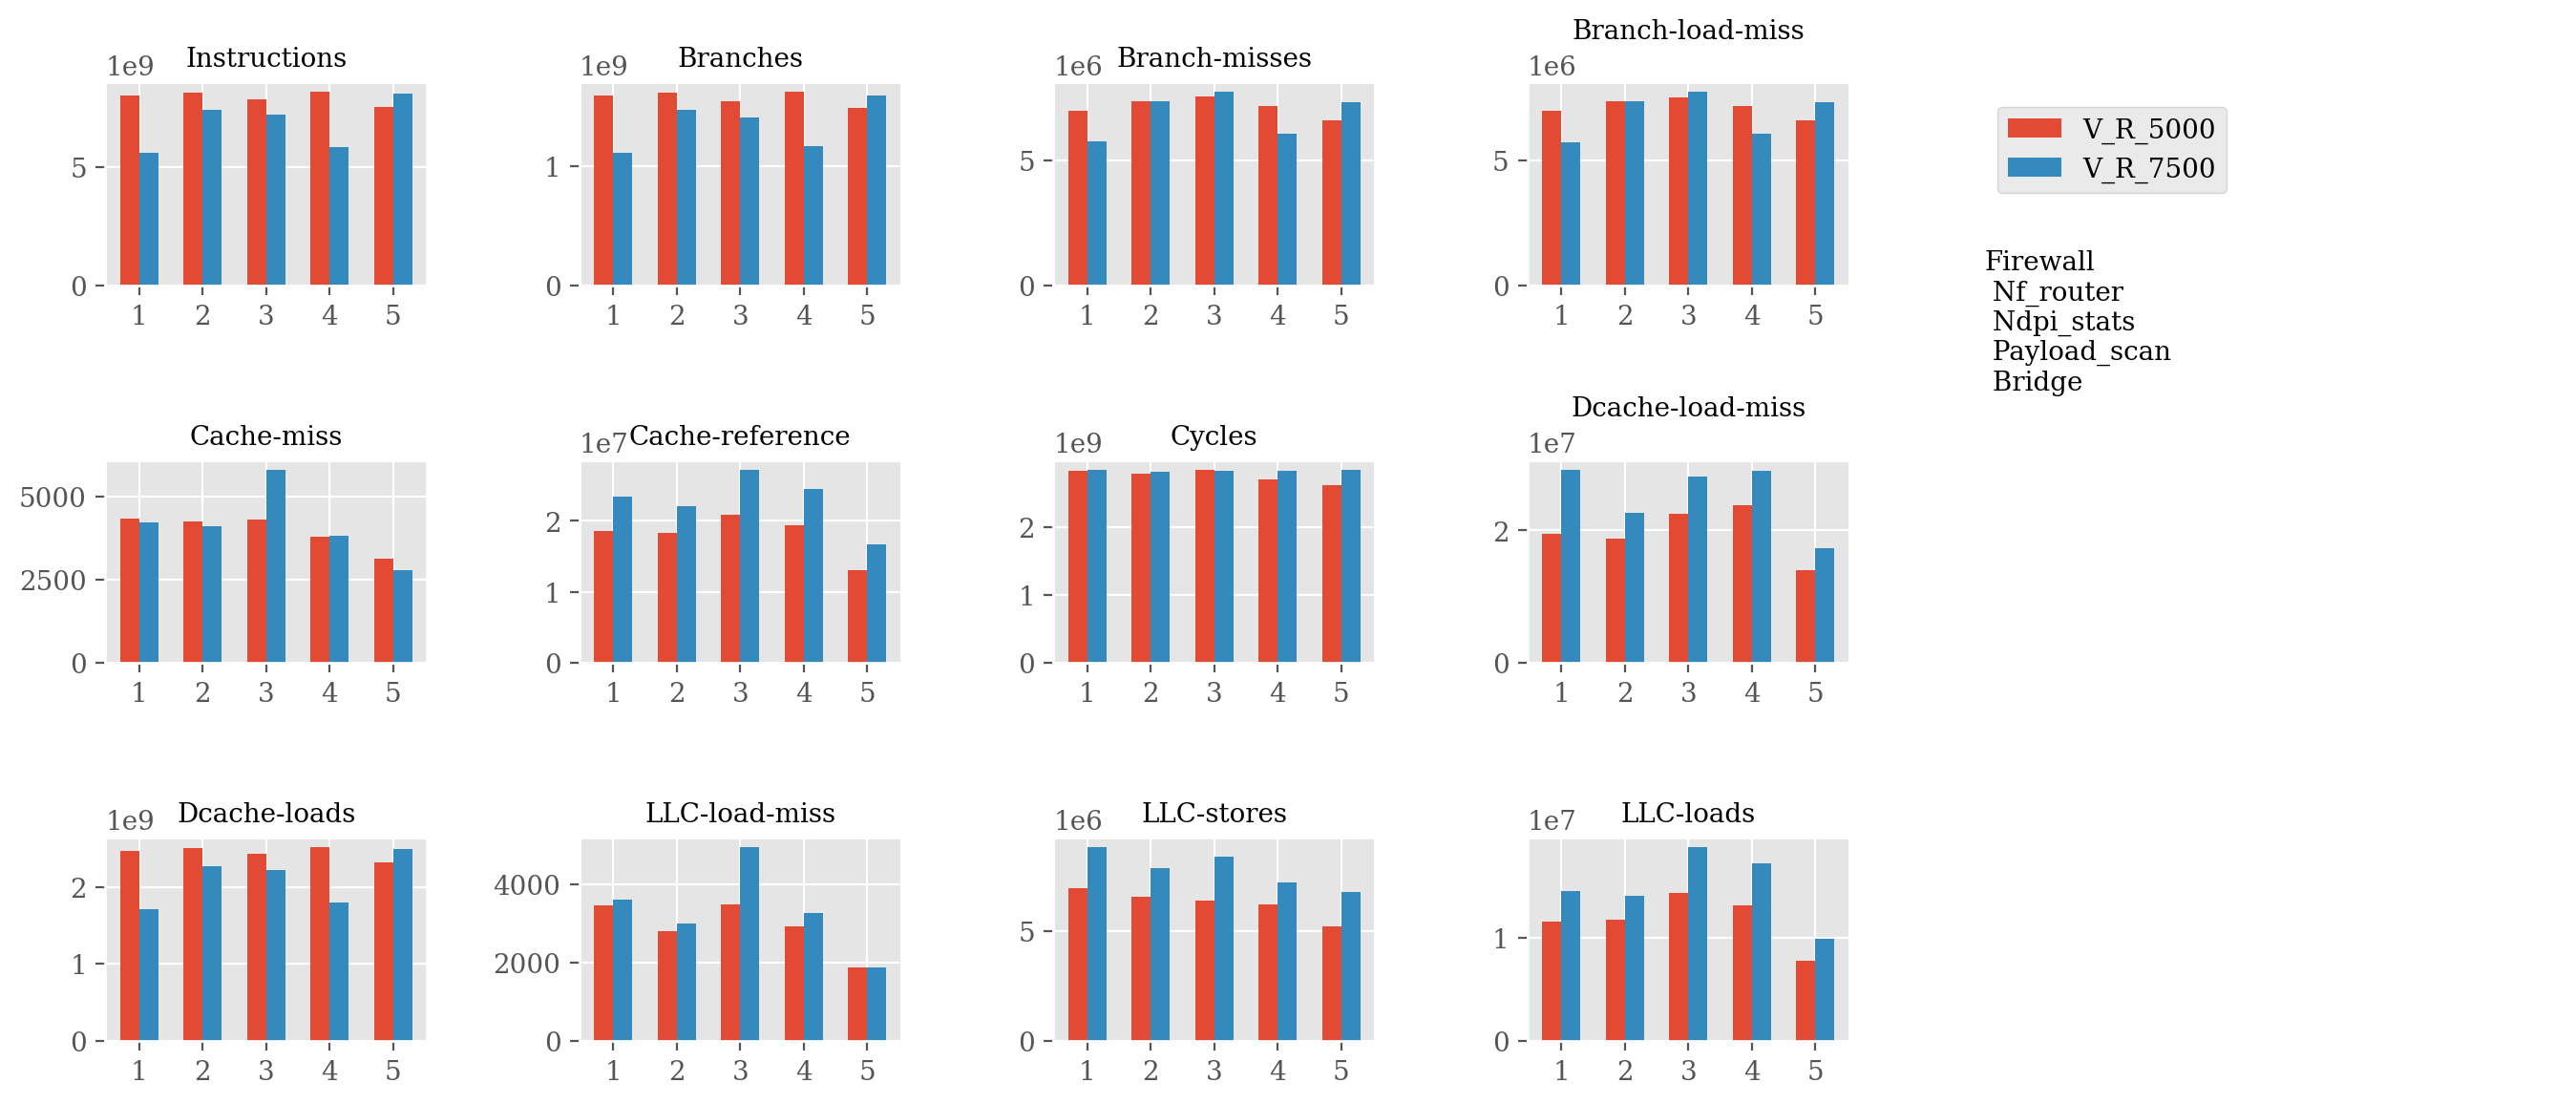

In [35]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


# Read the CSV file
df = pd.read_csv("load_stimulus_fixed_rate_5000_modified.csv")
df = df.replace(['<not counted>'], np.nan)

df1 = pd.read_csv("load_stimulus_fixed_rate_7500_modified.csv")
df1 = df1.replace(['<not counted>'], np.nan)

# Separate the features and target variable
X = df.drop(['input_rate','output_rate','latency'], axis=1)
X1 = df1.drop(['input_rate','output_rate','latency'], axis=1)

# generate V_R
V_R_5000 = X.mean()
V_R_7500 = X1.mean()

# define the x-axis labels for the bar plot
x_labels = np.arange(0, 63, 5)

# define the width of each bar
bar_width = 0.3
Feature = ['Instructions','Branches','Branch-misses','Branch-load-miss',
           'Cache-miss','Cache-reference','Cycles','Dcache-load-miss',
           'Dcache-loads','LLC-load-miss','LLC-stores','LLC-loads']

# Create a 4x3 grid of subplots
fig, axs = plt.subplots(3,4,  figsize=(10, 6))

# Loop through each subplot and plot a bar chart of 5 data points
for i, ax in enumerate(axs.flat):
    if i < 12:  
        start_index = i * 5  
        end_index = start_index + 5  
        x = range(start_index, end_index)  
        y = V_R_5000[start_index:end_index] 
        y1 = V_R_7500[start_index:end_index]
        x1 = [xi + bar_width for xi in x]  
        ax.bar(x, y, width=bar_width, label='V_R_5000')
        ax.bar(x1, y1, width=bar_width, label='V_R_7500')
    ax.set_title(f"{Feature[i]}",size=10)  # set the subplot title
    #ax.legend(fontsize=6, loc='lower right')
    ax.set_xticks([i + bar_width/2 for i in x])
    ax.set_xticklabels(['1', '2', '3', '4', '5'])
handles1, labels1 = ax.get_legend_handles_labels()

    
# Add a legend for the bars
legend_ax1 = fig.add_axes([1.05, 0.7, 0.1, 0.2])  # x, y, width, height
legend_ax1.axis('off')  # turn off the axis for the legend
legend_ax1.legend(handles1, labels1, bbox_to_anchor=(0, 1), loc='upper left')

# Add a legend for the x-axis labels
legend_ax2 = fig.add_axes([1.05, 0.6, 0.3, 0.2])  # x, y, width, height
legend_ax2.axis('off')  # turn off the axis for the legend
legend_ax2.text(0, 0.5, 'Firewall\n Nf_router \n Ndpi_stats\n Payload_scan\n Bridge', va='center')  # add the legend text


# Adjust the layout and spacing of the subplots
fig.tight_layout(pad=1.5, h_pad=2.5, w_pad=2.5)

# Adjust the layout and spacing of the subplots
fig.tight_layout(pad=1.5, h_pad=2.5, w_pad=2.5)


#save figure
folder_path = 'figures/phase_changed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'V_R.png')
plt.savefig(file_path, bbox_inches='tight')
plt.show()



In [36]:
# Define the function to classify a batch of data
type1_fw  = type1_fw.reshape(1,-1)
type1_nv  = type1_nv.reshape(1,-1)
type1_ndpi  = type1_ndpi.reshape(1,-1)
type1_pl  = type1_pl.reshape(1,-1)
type1_br  = type1_br.reshape(1,-1)


type2_fw  = type2_fw.reshape(1,-1)
type2_nv  = type2_nv.reshape(1,-1)
type2_ndpi  = type2_ndpi.reshape(1,-1)
type2_pl  = type2_pl.reshape(1,-1)
type2_br  = type2_br.reshape(1,-1)


def classify_batch(batch_data):
    if not isinstance(batch_data, np.ndarray):
        # Convert batch_data to a NumPy array if it's not already an array
        batch_data = np.array(batch_data)
    batch_data = batch_data.reshape(1, -1)
    # Compute the cosine similarity between each row of the batch and the two standard arrays
    cos_sim0 = cosine_similarity(batch_data, type1_fw)
    cos_sim1 = cosine_similarity(batch_data, type1_nv)
    cos_sim2 = cosine_similarity(batch_data, type1_ndpi)
    cos_sim3= cosine_similarity(batch_data, type1_pl)
    cos_sim4 = cosine_similarity(batch_data, type1_br)
    cos_sim5 = cosine_similarity(batch_data, type2_fw)
    cos_sim6 = cosine_similarity(batch_data, type2_nv)
    cos_sim7 = cosine_similarity(batch_data, type2_ndpi)
    cos_sim8 = cosine_similarity(batch_data, type2_pl)
    cos_sim9 = cosine_similarity(batch_data, type2_br)

    # Determine which standard array has the higher cosine similarity for each row of the batch
    predictions = np.argmax(np.column_stack((cos_sim0, cos_sim1, cos_sim2, cos_sim3,cos_sim4,
                                             cos_sim5,cos_sim6,cos_sim7,cos_sim8,cos_sim9)), axis=1) 
   # print(predictions)
    return predictions


In [65]:
# Define the generator to yield batches of data
def batch_generator(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i+batch_size]

# Define the successful classification count and the total count
success_count = 0
total_count = 0
 
# Process the data in batches and classify each batch
batch_size = 1
test_set = X1_test_br
#test_set = test_set.assign(labels=np.ones(len(test_set)))
true_labels = np.ones(len(test_set))
true_labels.fill(9)
for batch_data in batch_generator(test_set, batch_size):
    batch_predictions = classify_batch(batch_data)
    success_count += np.sum(batch_predictions == true_labels[i:i+batch_size])
    total_count += len(batch_data)

# Calculate the classification accuracy
accuracy = success_count / total_count

print(accuracy)

0.21920668058455114


In [76]:
def classify_batch(batch_data):
    if not isinstance(batch_data, np.ndarray):
        # Convert batch_data to a NumPy array if it's not already an array
        batch_data = np.array(batch_data)
    batch_data = batch_data.reshape(1, -1)
    # Compute the cosine similarity between each row of the batch and the two standard arrays
    cos_sim0 = cosine_similarity(batch_data, type1_fw)
    cos_sim1 = cosine_similarity(batch_data, type1_nv)
    cos_sim2 = cosine_similarity(batch_data, type1_ndpi)
    cos_sim3= cosine_similarity(batch_data, type1_pl)
    cos_sim4 = cosine_similarity(batch_data, type1_br)
    cos_sim5 = cosine_similarity(batch_data, type2_fw)
    cos_sim6 = cosine_similarity(batch_data, type2_nv)
    cos_sim7 = cosine_similarity(batch_data, type2_ndpi)
    cos_sim8 = cosine_similarity(batch_data, type2_pl)
    cos_sim9 = cosine_similarity(batch_data, type2_br)

    # Determine which standard array has the higher cosine similarity for each row of the batch
    predictions = np.argmax(np.column_stack((cos_sim5,cos_sim6,cos_sim7,cos_sim8,cos_sim9)),axis=1)
                                           # cos_sim0, cos_sim1, cos_sim2, cos_sim3,cos_sim4 cos_sim5,cos_sim6,cos_sim7,cos_sim8,cos_sim9)), axis=1) 
    return predictions
                                            
# Define the generator to yield batches of data
def batch_generator(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i+batch_size]

# Define the successful classification count and the total count
success_count = 0
total_count = 0
 
# Process the data in batches and classify each batch
batch_size = 1
test_set = X1_test_pl
#test_set = test_set.assign(labels=np.ones(len(test_set)))
true_labels = np.ones(len(test_set))
true_labels.fill(3)
for batch_data in batch_generator(test_set, batch_size):
    batch_predictions = classify_batch(batch_data)
    success_count += np.sum(batch_predictions == true_labels[i:i+batch_size])
    total_count += len(batch_data)

# Calculate the classification accuracy
accuracy = success_count / total_count

print(f'vnf and rate prediction accuracy: {accuracy}')

vnf and rate prediction accuracy: 0.0006958942240779402


# DNN to do classification

In [83]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv("load_stimulus_fixed_rate_5000_modified.csv")
df = df.replace(['<not counted>'], np.nan)

df1 = pd.read_csv("load_stimulus_fixed_rate_7500_modified.csv")
df1 = df1.replace(['<not counted>'], np.nan)

# Separate the features and target variable
X = df1.drop(['input_rate','output_rate','latency'], axis=1)



In [87]:
import numpy as np
import pandas as pd
import itertools
from sklearn.preprocessing import MinMaxScaler



original_order = X.columns
original_list=original_order

new_order = original_list[0::5]+original_list[1::5]+original_list[2::5]+original_list[3::5]+original_list[4::5]  
 
new_X= X.reindex(columns=new_order )
new_X= pd.DataFrame(new_X.values.reshape((len(X)* 5, 12)))
new_X=new_X.values
new_X= new_X.astype(float) 
scaler = MinMaxScaler()
new_X = scaler.fit_transform(new_X)
new_X = new_X.reshape((-1, 12))
print(new_X)

pattern = [0, 1, 2, 3, 4]
length = len(X) * 5
y = list(itertools.islice(itertools.cycle(pattern), length))


X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)

ValueError: cannot reshape array of size 86196 into shape (35915,12)

In [186]:
y_train = np.array(y_train)
y_test=np.array(y_test)
# Step 3: Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Convert labels to categorical format
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [187]:
from keras.models import Sequential
from keras.layers import Dense

# Step 5: Build your DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(12,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Step 6: Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_categorical, epochs=10, batch_size=32)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print('Test accuracy:', accuracy)



Epoch 1/10
898/898 [==============================] - 4s 4ms/step - loss: 0.3188 - accuracy: 0.9237
Epoch 2/10
898/898 [==============================] - 4s 4ms/step - loss: 0.0338 - accuracy: 0.9891
Epoch 3/10
898/898 [==============================] - 3s 4ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 4/10
898/898 [==============================] - 3s 3ms/step - loss: 0.0175 - accuracy: 0.9952
Epoch 5/10
898/898 [==============================] - 4s 5ms/step - loss: 0.0142 - accuracy: 0.9961
Epoch 6/10
898/898 [==============================] - 3s 4ms/step - loss: 0.0115 - accuracy: 0.9967
Epoch 7/10
898/898 [==============================] - 3s 3ms/step - loss: 0.0092 - accuracy: 0.9975
Epoch 8/10
898/898 [==============================] - 3s 3ms/step - loss: 0.0077 - accuracy: 0.9981
Epoch 9/10
898/898 [==============================] - 3s 3ms/step - loss: 0.0071 - accuracy: 0.9983
Epoch 10/10
225/225 [==============================] - 1s 3ms/step - loss: 0.0058 - accuracy: 0.9976

In [188]:
from sklearn.metrics import accuracy_score

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

class_accuracy = {}
for class_label in range(5):
    class_indices = np.where(y_test_classes == class_label)[0]
    class_pred = y_pred_classes[class_indices]
    class_true = y_test_classes[class_indices]
    class_accuracy[class_label] = accuracy_score(class_true, class_pred)

# Print the accuracy for each class
for class_label, acc in class_accuracy.items():
    print(f"Accuracy for class {class_label}: {acc}")


225/225 [==============================] - 0s 2ms/step
Accuracy for class 0: 0.9978354978354979
Accuracy for class 1: 0.9986168741355463
Accuracy for class 2: 1.0
Accuracy for class 3: 0.9918864097363083
Accuracy for class 4: 1.0


# merge two different rate into one big dataset

In [93]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv("load_stimulus_fixed_rate_5000_modified.csv")
df = df.replace(['<not counted>'], np.nan)
df1 = pd.read_csv("load_stimulus_fixed_rate_7500_modified.csv")
df1 = df1.replace(['<not counted>'], np.nan)

combined_df = pd.concat([df,df1],axis=0)

# Separate the features and target variable
X = combined_df.drop(['input_rate','output_rate','latency'], axis=1)






In [95]:
import numpy as np
import pandas as pd
import itertools
from sklearn.preprocessing import MinMaxScaler



original_order = X.columns
print(original_list)
new_order = original_list[0::5]+original_list[1::5]+original_list[2::5]+original_list[3::5]+original_list[4::5]  
 
new_X= X.reindex(columns=new_order )
new_X= pd.DataFrame(new_X.values.reshape((len(X)* 5, 12)))
new_X=new_X.values
new_X= new_X.astype(float) 
scaler = MinMaxScaler()
new_X = scaler.fit_transform(new_X)
new_X = new_X.reshape((-1, 12))
print(new_X)


pattern = [0, 1, 2, 3, 4]
length = len(df) * 5
y1 = list(itertools.islice(itertools.cycle(pattern), length))
pattern = [5, 6, 7, 8, 9]

length = len(df1) * 5
y2 = list(itertools.islice(itertools.cycle(pattern), length))
y=y1+y2



#打乱顺序
np.random.seed(0)
shuffled_indices = np.random.permutation(len(new_X))
new_X= new_X[shuffled_indices]
y = [y[i] for i in shuffled_indices]








X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)

Index(['firewall_instructions', 'nf_router_instructions',
       'ndpi_stats_instructions', 'payload_scan_instructions',
       'bridge_instructions', 'firewall_branches', 'nf_router_branches',
       'ndpi_stats_branches', 'payload_scan_branches', 'bridge_branches',
       'firewall_branch-misses', 'nf_router_branch-misses',
       'ndpi_stats_branch-misses', 'payload_scan_branch-misses',
       'bridge_branch-misses', 'firewall_branch-load-misses',
       'nf_router_branch-load-misses', 'ndpi_stats_branch-load-misses',
       'payload_scan_branch-load-misses', 'bridge_branch-load-misses',
       'firewall_cache-misses', 'nf_router_cache-misses',
       'ndpi_stats_cache-misses', 'payload_scan_cache-misses',
       'bridge_cache-misses', 'firewall_cache-references',
       'nf_router_cache-references', 'ndpi_stats_cache-references',
       'payload_scan_cache-references', 'bridge_cache-references',
       'firewall_cycles', 'nf_router_cycles', 'ndpi_stats_cycles',
       'payload_scan

ValueError: cannot reshape array of size 172404 into shape (71835,12)

In [207]:
y_train = np.array(y_train)
y_test=np.array(y_test)
# Step 3: Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Convert labels to categorical format
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [210]:
from keras.models import Sequential
from keras.layers import Dense

# Step 5: Build your DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(12,)))
#model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Step 6: Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_categorical, epochs=10, batch_size=32)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print('Test accuracy:', accuracy)


Epoch 1/10
1796/1796 [==============================] - 7s 3ms/step - loss: 1.2036 - accuracy: 0.7530
Epoch 2/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.3684 - accuracy: 0.9603
Epoch 3/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.1714 - accuracy: 0.9773
Epoch 4/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.1002 - accuracy: 0.9855
Epoch 5/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0675 - accuracy: 0.9899
Epoch 6/10
1796/1796 [==============================] - 6s 4ms/step - loss: 0.0505 - accuracy: 0.9919
Epoch 7/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9926
Epoch 8/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0354 - accuracy: 0.9933
Epoch 9/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0315 - accuracy: 0.9937
Epoch 10/10
449/449 [==============================] - 1s 3ms/step - loss: 0.0272 

In [203]:
from sklearn.metrics import accuracy_score

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

class_accuracy = {}
for class_label in range(10):
    class_indices = np.where(y_test_classes == class_label)[0]
    class_pred = y_pred_classes[class_indices]
    class_true = y_test_classes[class_indices]
    class_accuracy[class_label] = accuracy_score(class_true, class_pred)

# Print the accuracy for each class
for class_label, acc in class_accuracy.items():
    print(f"Accuracy for class {class_label}: {acc}")

449/449 [==============================] - 1s 2ms/step
Accuracy for class 0: 0.9923130677847659
Accuracy for class 1: 0.984363894811656
Accuracy for class 2: 0.999271137026239
Accuracy for class 3: 1.0
Accuracy for class 4: 0.9993103448275862
Accuracy for class 5: 0.9952956989247311
Accuracy for class 6: 0.9979716024340771
Accuracy for class 7: 0.9986586183769283
Accuracy for class 8: 1.0
Accuracy for class 9: 1.0


In [211]:
from sklearn.metrics import accuracy_score

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

class_accuracy = {}
for class_label in range(10):
    class_indices = np.where(y_test_classes == class_label)[0]
    class_pred = y_pred_classes[class_indices]
    class_true = y_test_classes[class_indices]
    class_accuracy[class_label] = accuracy_score(class_true, class_pred)

# Print the accuracy for each class
for class_label, acc in class_accuracy.items():
    print(f"Accuracy for class {class_label}: {acc}")

449/449 [==============================] - 1s 2ms/step
Accuracy for class 0: 0.9758454106280193
Accuracy for class 1: 0.9958217270194986
Accuracy for class 2: 0.9972222222222222
Accuracy for class 3: 0.9971850809289233
Accuracy for class 4: 0.9993089149965446
Accuracy for class 5: 0.9936664320900774
Accuracy for class 6: 0.9937282229965156
Accuracy for class 7: 0.9929824561403509
Accuracy for class 8: 0.9978902953586498
Accuracy for class 9: 0.9993201903467029
